# Cross study mapping of human b-cell states 

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.8 umap==0.4.5 numpy==1.21.2 scipy==1.5.4 pandas==1.3.5 scikit-learn==0.22 statsmodels==0.13.2 python-igraph==0.8.0 louvain==0.7.0 leidenalg==0.7.0


In [3]:
sc.set_figure_params(frameon=False, dpi_save=300, color_map='Reds')

## Generate data dict

In [4]:
beta_dict = {}
alpha_dict = {}

### Xin et al.

In [5]:
xin = sc.read('./data/xin.h5ad')

In [6]:
beta_dict['Xin'] = xin[xin.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Xin'] = xin[xin.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Segerstolpe et al.

In [7]:
segerstolpe = sc.read('./data/segerstolpe.h5ad')

In [8]:
beta_dict['Segerstolpe'] = segerstolpe[segerstolpe.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Segerstolpe'] = segerstolpe[segerstolpe.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Baron et al.

In [9]:
baron = sc.read('./data/baron.h5ad')

In [10]:
beta_dict['Baron'] = baron[baron.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Baron'] = baron[baron.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Lawlor et al.

In [11]:
lawlor = sc.read('./data/lawlor.h5ad')

In [12]:
beta_dict['Lawlor'] = lawlor[lawlor.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Lawlor'] = lawlor[lawlor.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Muraro et al.

In [13]:
muraro = sc.read('./data/muraro.h5ad')

In [14]:
beta_dict['Muraro'] = muraro[muraro.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Muraro'] = muraro[muraro.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Enge et al.

In [15]:
enge = sc.read('./data/enge.h5ad')

In [16]:
beta_dict['Enge'] = enge[enge.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Enge'] = enge[enge.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Shrestha et al.

In [17]:
shrestha = sc.read('./data/shrestha.h5ad')

In [18]:
beta_dict['Shrestha'] = shrestha[shrestha.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Shrestha'] = shrestha[shrestha.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Fasolino et al.

In [19]:
fasolino = sc.read('./data/fasolino.h5ad')

In [20]:
beta_dict['Fasolino'] = fasolino[fasolino.obs.cell_label.isin(['beta_major', 'beta_minor'])].copy()
alpha_dict['Fasolino'] = fasolino[fasolino.obs.cell_label.isin(['alpha'])].copy()

### Fang et al.

In [21]:
fang = sc.read('./data/fang.h5ad')

In [22]:
beta_dict['Fang'] = fang[fang.obs.louvain_anno_broad.isin(['beta'])].copy()
alpha_dict['Fang'] = fang[fang.obs.louvain_anno_broad.isin(['alpha'])].copy()

### split by condition

In [23]:
beta_dict_healthy = beta_dict.copy()
for k,v in beta_dict_healthy.items():
    beta_dict_healthy[k] = v[v.obs.condition=='healthy'].copy()

In [24]:
beta_dict_t2d = {}
for k,v in beta_dict.items():
    if np.sum(v.obs.condition=='T2D')>0:
        beta_dict_t2d[k] = v[v.obs.condition=='T2D'].copy()

In [25]:
beta_dict_t1d = {}
for k,v in beta_dict.items():
    if np.sum(v.obs.condition=='T1D')>0:
        beta_dict_t1d[k] = v[v.obs.condition=='T1D'].copy()

In [26]:
beta_dict_t1d_aab = {}
for k,v in beta_dict.items():
    if np.sum(v.obs.condition=='T1D AAB')>0:
        beta_dict_t1d_aab[k] = v[v.obs.condition=='T1D AAB'].copy()

## QC metrics

In [27]:
adata_beta = sc.read('./data/adata_human_beta.h5ad')

### healthy

In [28]:
v= adata_beta.copy()
n_cells = int(v.obs.donor.value_counts().median())
n_d = len(v.obs.donor.unique())
n_genes = v.obs.n_genes.median()
n_cells_tot = v.n_obs
print(f'Tritschler\nn={n_d}, total cells={n_cells_tot}, median cells={n_cells}, median genes={n_genes}')

Tritschler
n=5, total cells=11923, median cells=2196, median genes=3331.0


In [29]:
for k,v in beta_dict_healthy.items():
    n_cells = int(v.obs.donor.value_counts().median())
    n_cells_tot = v.n_obs
    n_d = len(v.obs.donor.unique())
    n_genes = v.obs.n_genes.median()
    print(f'{k}\nn={n_d}, total cells={n_cells_tot}, median cells={n_cells}, median genes={n_genes}')

Xin
n=12, total cells=8317, median cells=718, median genes=2332.0
Segerstolpe
n=6, total cells=171, median cells=33, median genes=4709.0
Baron
n=3, total cells=2030, median cells=787, median genes=1824.0
Lawlor
n=5, total cells=162, median cells=25, median genes=7917.0
Muraro
n=4, total cells=480, median cells=146, median genes=5202.0
Enge
n=8, total cells=472, median cells=45, median genes=3493.5
Shrestha
n=5, total cells=11033, median cells=2209, median genes=2333.0
Fasolino
n=11, total cells=3158, median cells=141, median genes=2853.0
Fang
n=6, total cells=6731, median cells=1151, median genes=673.0


In [30]:
v = adata_beta.copy()
n_d_v = v.obs[['donor', 'n_genes']].groupby('donor').median()
n_d = pd.DataFrame(v.obs.donor.value_counts())
n_d['n_genes'] = n_d_v.loc[n_d.index]
print(f'Tritschler')
display(n_d)

Tritschler


donor  n_genes
74   3827   3270.0
63   2440   3088.0
61   2196   3407.5
22   1975   3390.0
24   1485   3700.0

In [31]:
for k,v in beta_dict_healthy.items():
    n_d_v = v.obs[['donor', 'n_genes']].groupby('donor').median()
    n_d = pd.DataFrame(v.obs.donor.value_counts())
    n_d['n_genes'] = n_d_v.loc[n_d.index]
    print(f'{k}')
    display(n_d)

Xin


donor  n_genes
donor_12   1301   2151.0
donor_9     994   2878.0
donor_7     876   2612.0
donor_11    787   1572.0
donor_3     749   2581.0
donor_10    748   2239.0
donor_4     688   2577.5
donor_8     607   2579.0
donor_1     523   2071.0
donor_5     489   2712.0
donor_2     438   2124.0
donor_6     117   1522.0

Segerstolpe


donor  n_genes
HP1502401     48   4060.0
HP1504901     35   2945.0
HP1507101     34   6569.0
HP1506401     32   7454.0
AZ            12   4001.0
HP1509101     10   5389.0

Baron


donor  n_genes
GSM2230757    872   1963.0
GSM2230759    787   1660.0
GSM2230758    371   1946.0

Lawlor


donor  n_genes
29     69   7984.0
22     47   8216.0
56     25   7685.0
30     12   8077.0
53      9   7737.0

Muraro


donor  n_genes
D31    158   4869.0
D29    155   5031.0
D30    138   5562.0
D28     29   6850.0

Enge


donor  n_genes
21    156   5167.5
22     83   3210.0
38     61   3938.0
1      48   2215.5
6      43   2500.0
5      34   3012.5
54     24   2129.0
44     23   4316.0

Shrestha


donor  n_genes
59   3293   2567.0
39   2510   2041.5
50   2209   2505.0
14   1740   1909.0
66   1281   3256.0

Fasolino


donor  n_genes
1    1134   2954.5
6     444   2950.0
4     408   2934.5
8     332   3409.5
5     274   3129.5
11    141   1211.0
10    133   2672.0
7     104   1780.0
9     104   2088.5
2      72   3827.0
3      12   3828.0

Fang


donor  n_genes
GSM2700340_H3   2225    690.0
GSM2700341_H4   1847    655.0
GSM2863188_H6   1367    592.0
GSM2700342_H5    935    692.0
GSM2700338_H1    214    991.5
GSM2700339_H2    143    783.0

### T2D

In [32]:
for k,v in beta_dict_t2d.items():
    n_cells = int(v.obs.donor.value_counts().median())
    n_d = len(v.obs.donor.unique())
    n_genes = v.obs.n_genes.median()
    print(f'{k}\nn={n_d}, median cells={n_cells}, median genes={n_genes}')

Segerstolpe
n=4, median cells=12, median genes=6851.0
Baron
n=1, median cells=495, median genes=2136.0
Lawlor
n=3, median cells=27, median genes=7680.0
Fang
n=3, median cells=363, median genes=522.0


In [102]:
for k,v in beta_dict_t2d.items():
    n_d_v = v.obs[['donor', 'n_genes']].groupby('donor').median()
    n_d = pd.DataFrame(v.obs.donor.value_counts())
    n_d['n_genes'] = n_d_v.loc[n_d.index]
    print(f'{k}')
    display(n_d)

Segerstolpe


donor  n_genes
HP1526901T2D     64   7062.5
HP1508501T2D     14   5900.5
HP1525301T2D     11   6914.0
HP1504101T2D     10   5840.5

Baron


donor  n_genes
GSM2230760    495   2136.0

Lawlor


donor  n_genes
42     55   7584.0
55     27   7383.0
51     13   8167.0

Fang


donor  n_genes
GSM2863189_T2D3    984    443.0
GSM2700344_T2D2    363    729.0
GSM2700343_T2D1    219    702.0

In [33]:
for k,v in beta_dict_t1d.items():
    n_cells = int(v.obs.donor.value_counts().median())
    n_d = len(v.obs.donor.unique())
    n_genes = v.obs.n_genes.median()
    print(f'{k}\nn={n_d}, median cells={n_cells}, median genes={n_genes}')

Fasolino
n=5, median cells=81, median genes=1360.0


In [34]:
for k,v in beta_dict_t1d_aab.items():
    n_cells = int(v.obs.donor.value_counts().median())
    n_d = len(v.obs.donor.unique())
    n_genes = v.obs.n_genes.median()
    print(f'{k}\nn={n_d}, median cells={n_cells}, median genes={n_genes}')

Fasolino
n=8, median cells=668, median genes=3210.0


## Beta cell mapping

#### Gene set representation

subset gene sets to overlapping genes

In [35]:
mk_human = pd.read_excel('./data/output_files/gene_sets_beta.xlsx')
mk_human_map = {}
for col in mk_human.columns:
    mk_human_map[col] = [gene for gene in mk_human[col] if gene in adata_beta.var_names]

gene set scoring

In [36]:
sc.settings.verbosity=1
for key in mk_human_map.keys():
    sc.tl.score_genes(adata_beta, gene_list=[gene for gene in mk_human_map[key] if gene in adata_beta.var_names], score_name=f'human_G{key}')

gene set representation

In [37]:
# sorted gene sets
obs_g = ['_'.join(['human',a]) for a in ['G7', 'G8', 'G10', 'G11','G3', 'G17', 'G1', 'G2', 'G5', 'G6', 'G4', 'G12', 'G13', 'G14', 'G18', 'G19', 'G9', 'G16']]

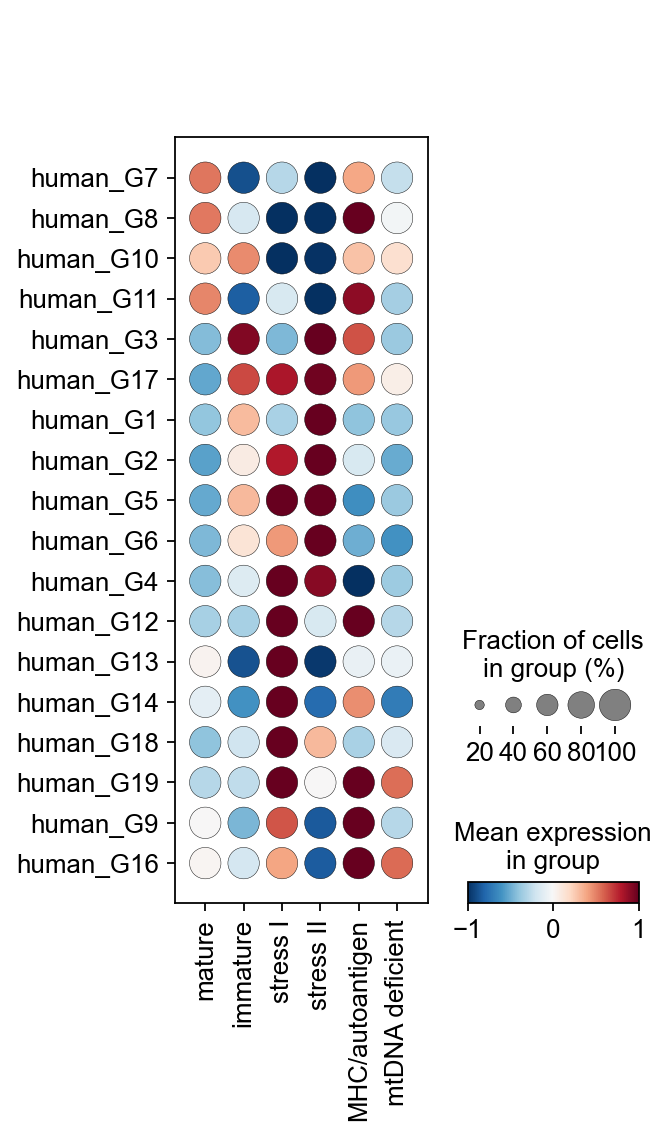

In [38]:
adata_beta_g = sc.AnnData(adata_beta.obs[obs_g])
adata_beta_g.obs = adata_beta.obs
sc.pl.dotplot(sc.pp.scale(adata_beta_g, copy=True), groupby='louvain_anno_fine', 
              var_names=adata_beta_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

scaling

In [39]:
adata_beta_g_scaled = sc.pp.scale(adata_beta_g, copy=True)

compute reference embedding

In [40]:
sc.pp.pca(adata_beta_g_scaled)
sc.pp.neighbors(adata_beta_g_scaled)
sc.tl.umap(adata_beta_g_scaled)

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


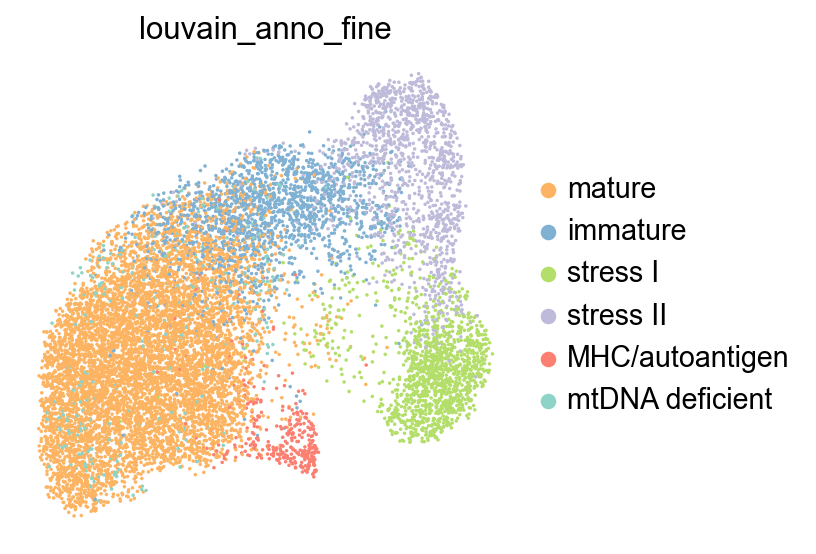

In [41]:
sc.set_figure_params(frameon=False)
adata_beta_g_scaled.uns['louvain_anno_fine_colors']=['#fdb462', '#80b1d3', '#b3de69', '#bebada', '#fb8072', '#8dd3c7']
sc.pl.umap(adata_beta_g_scaled, color='louvain_anno_fine')

### Mapping in gene set space

In [42]:
beta_dict_healthy_g = {}
beta_dict_t2d_g = {}
beta_dict_t1d_g = {}
beta_dict_t1d_aab_g = {}

In [43]:
for k,v in beta_dict.items():
    for key in mk_human_map.keys():
        sc.tl.score_genes(v, gene_list=[gene for gene in mk_human_map[key] if gene in v.var_names], score_name=f'human_G{key}')
    v_g = sc.AnnData(v.obs[obs_g])
    v_g.obs = v.obs
    v_g_scaled = sc.pp.scale(v_g, copy=True)
    sc.tl.ingest(v_g_scaled, adata_beta_g_scaled , obs='louvain_anno_fine', neighbors_key='neighbors')
    v.obs['louvain_anno_fine'] = v_g_scaled.obs['louvain_anno_fine']
    beta_dict_healthy[k] = v[v.obs.condition=='healthy'].copy()
    beta_dict_healthy_g[k] = v_g_scaled[v.obs.condition=='healthy'].copy()
    
    if np.sum(v.obs.condition=='T2D')>0:
        beta_dict_t2d[k] = v[v.obs.condition=='T2D'].copy()
        beta_dict_t2d_g[k] = v_g_scaled[v.obs.condition=='T2D'].copy()
    if np.sum(v.obs.condition=='T1D')>0:
        beta_dict_t1d[k] = v[v.obs.condition=='T1D'].copy()
        beta_dict_t1d_g[k] = v_g_scaled[v.obs.condition=='T1D'].copy()
    if np.sum(v.obs.condition=='T1D AAB')>0:
        beta_dict_t1d_aab[k] = v[v.obs.condition=='T1D AAB'].copy()
        beta_dict_t1d_aab_g[k] = v_g_scaled[v.obs.condition=='T1D AAB'].copy()

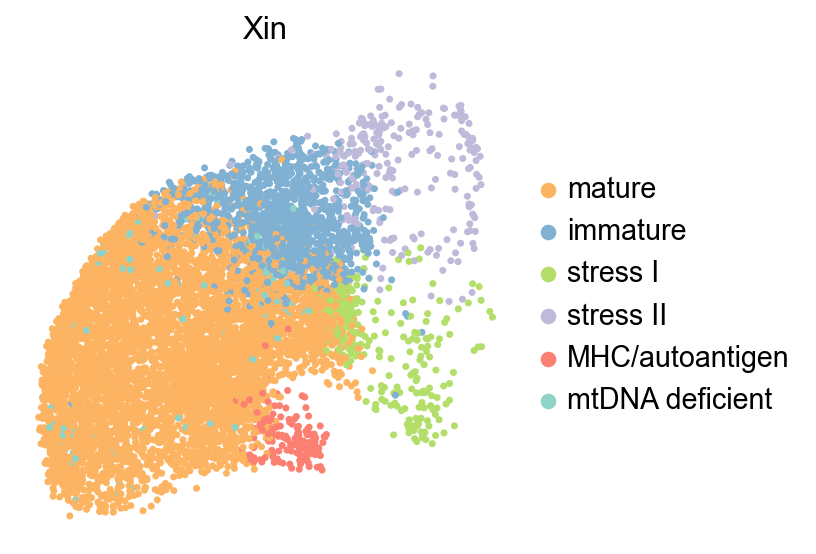

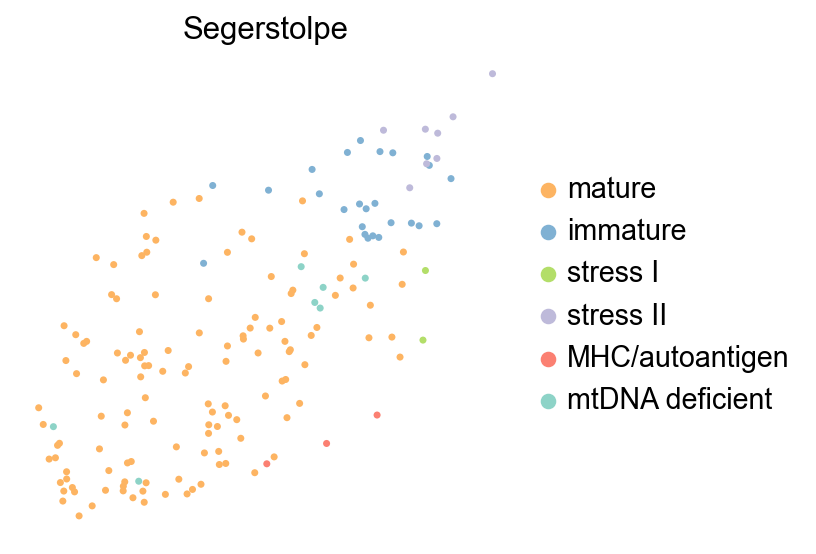

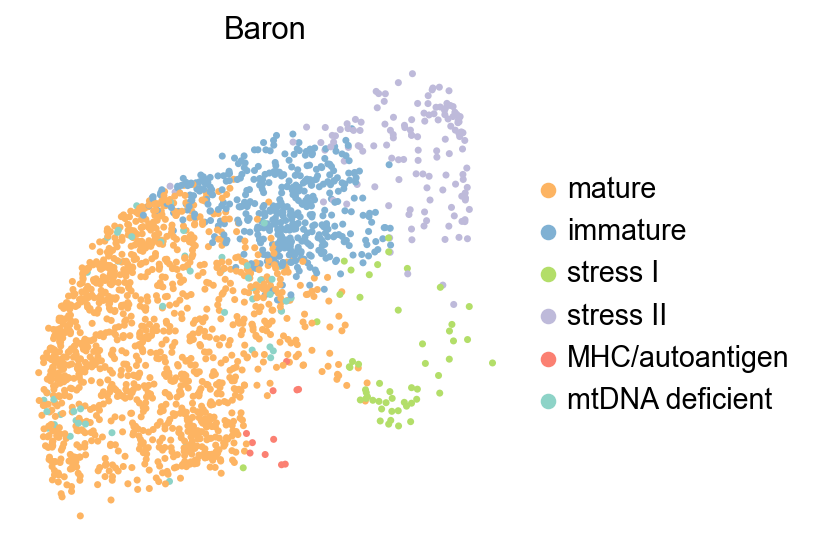

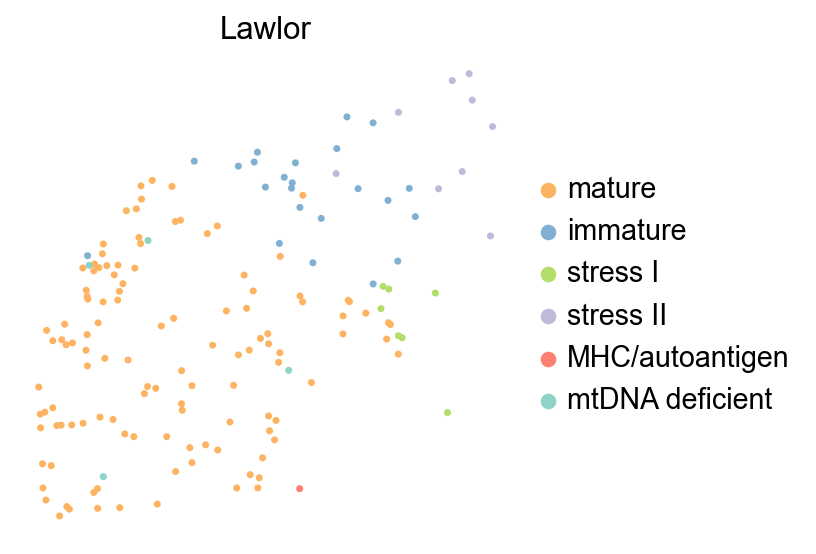

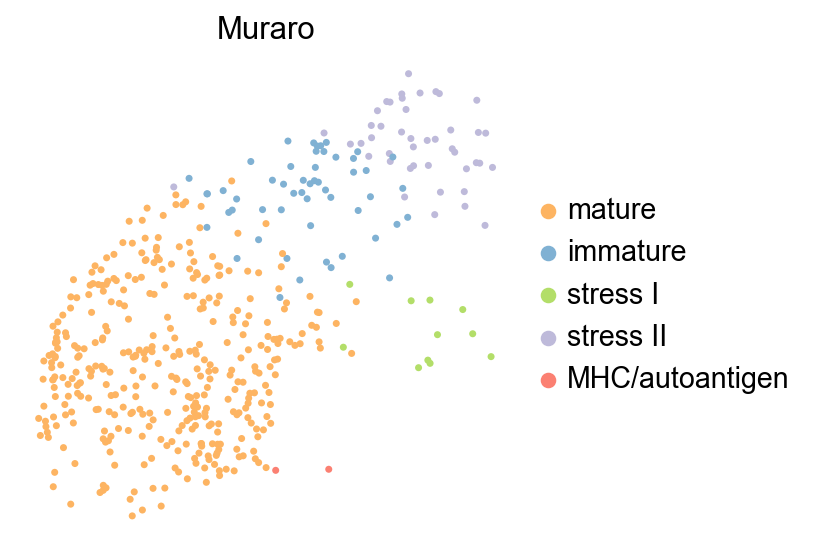

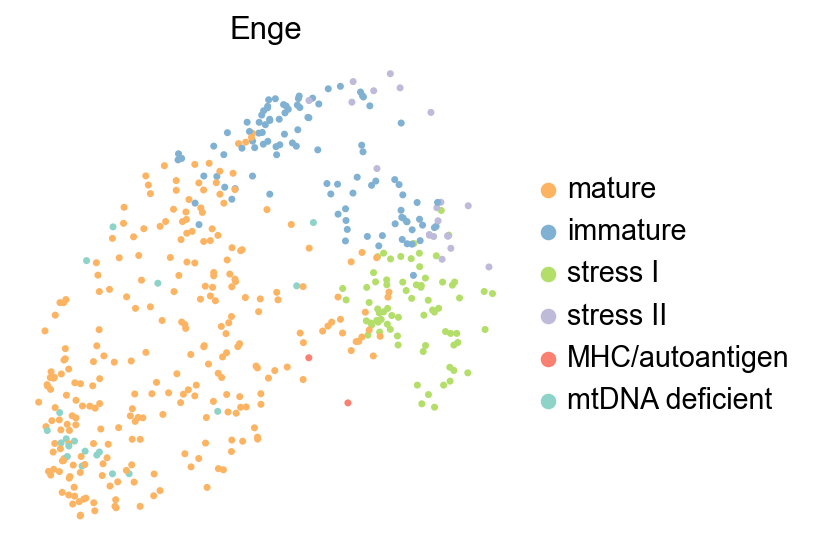

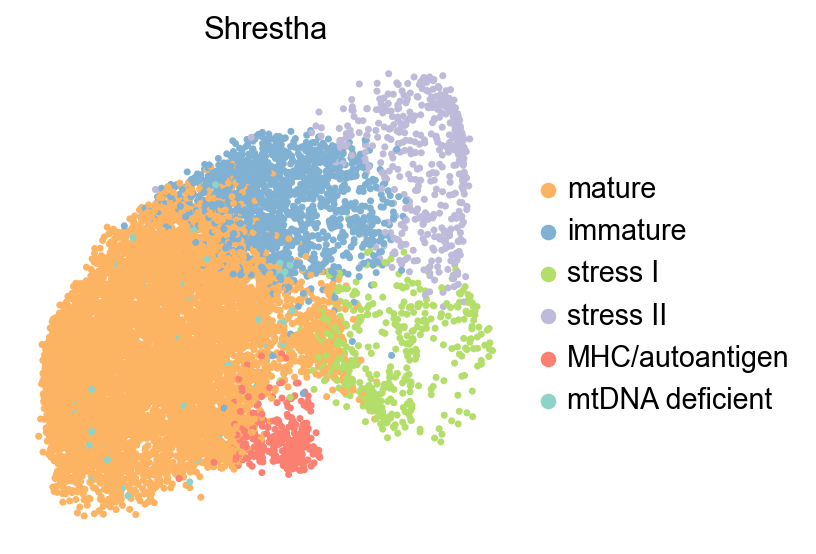

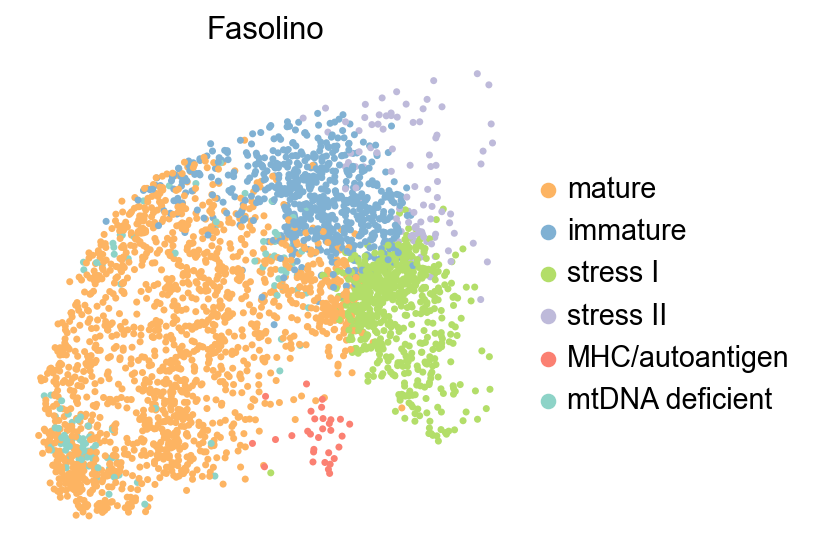

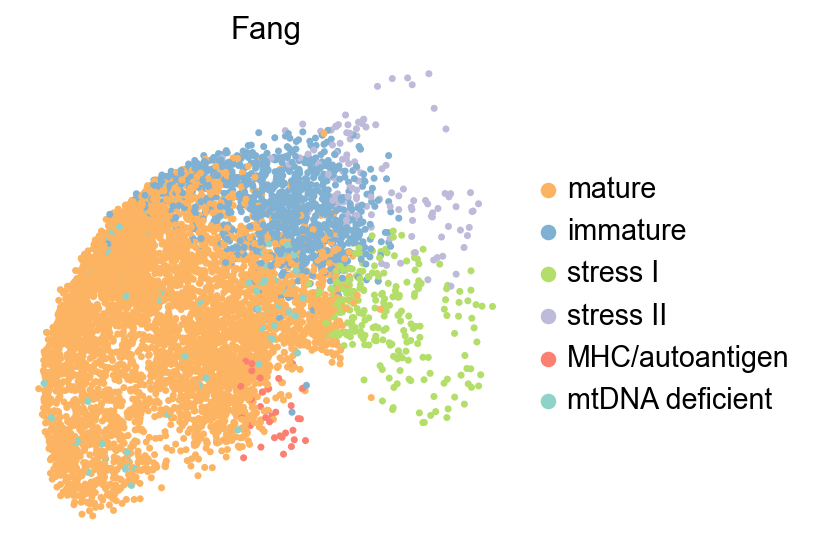

In [44]:
for k,v in beta_dict_healthy_g.items():
    v.uns['louvain_anno_fine_colors']=['#fdb462', '#80b1d3', '#b3de69', '#bebada', '#fb8072', '#8dd3c7']
    sc.pl.umap(v, color='louvain_anno_fine', title=k, size=40)

### State composition

In [45]:
import matplotlib.pyplot as pl

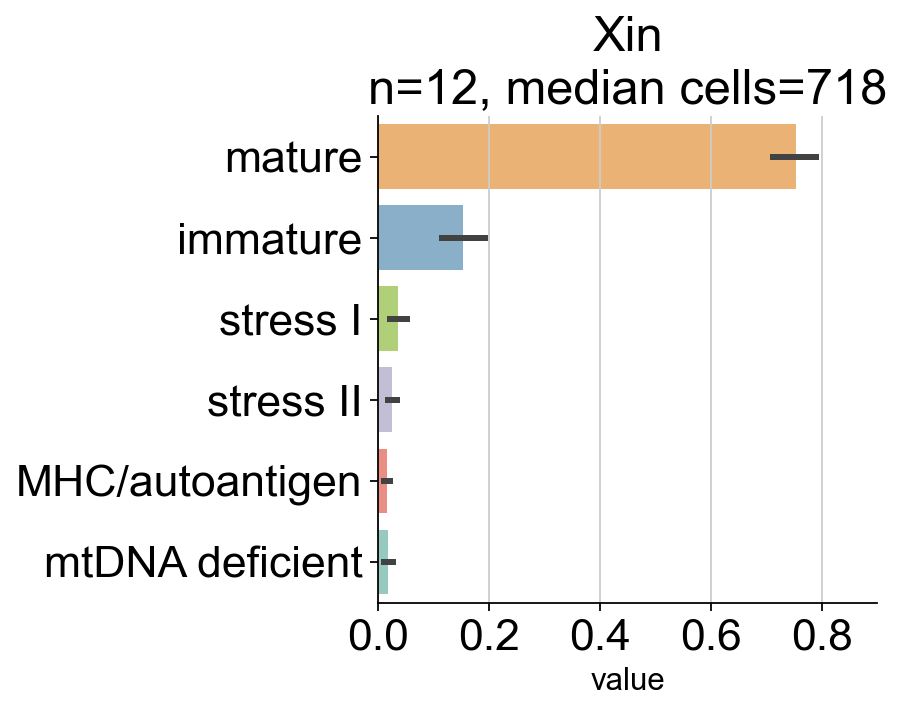

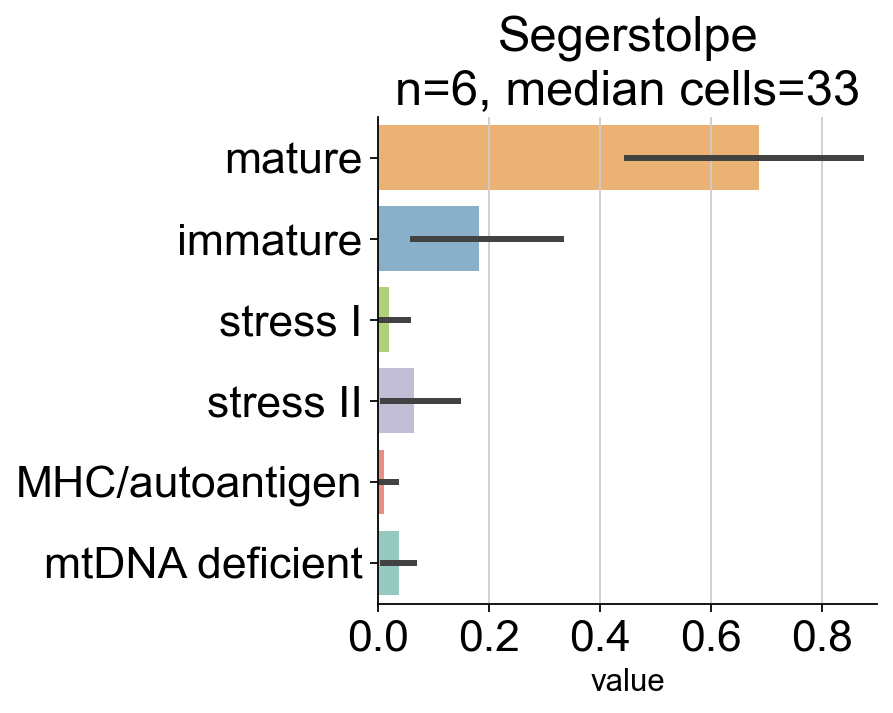

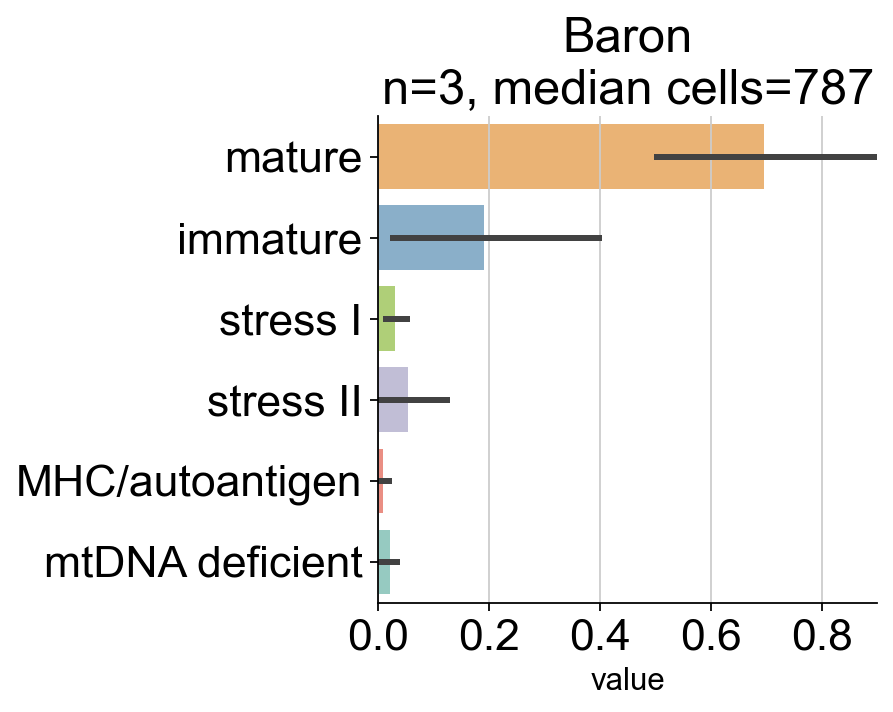

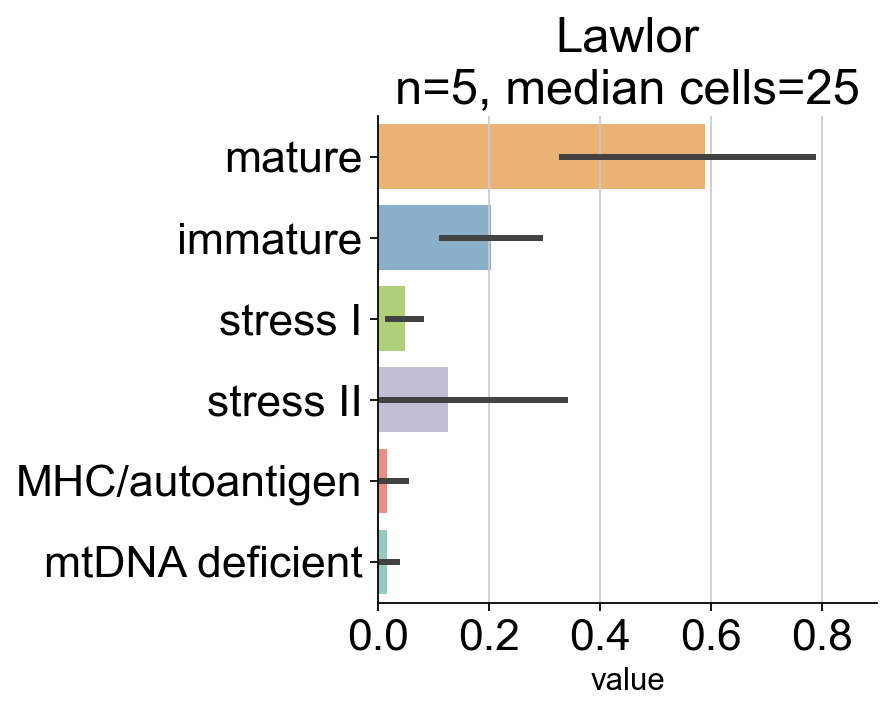

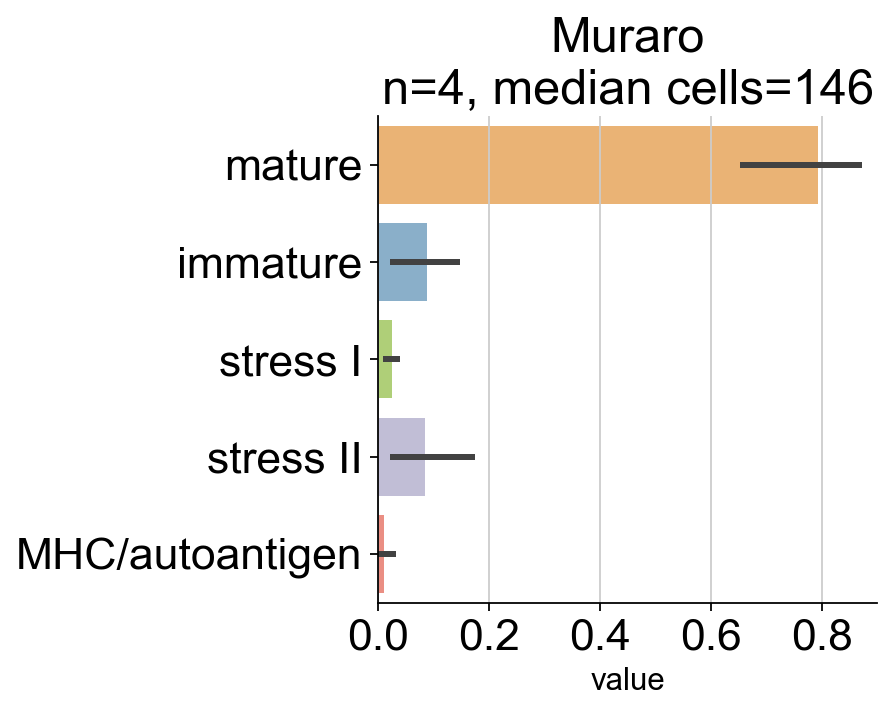

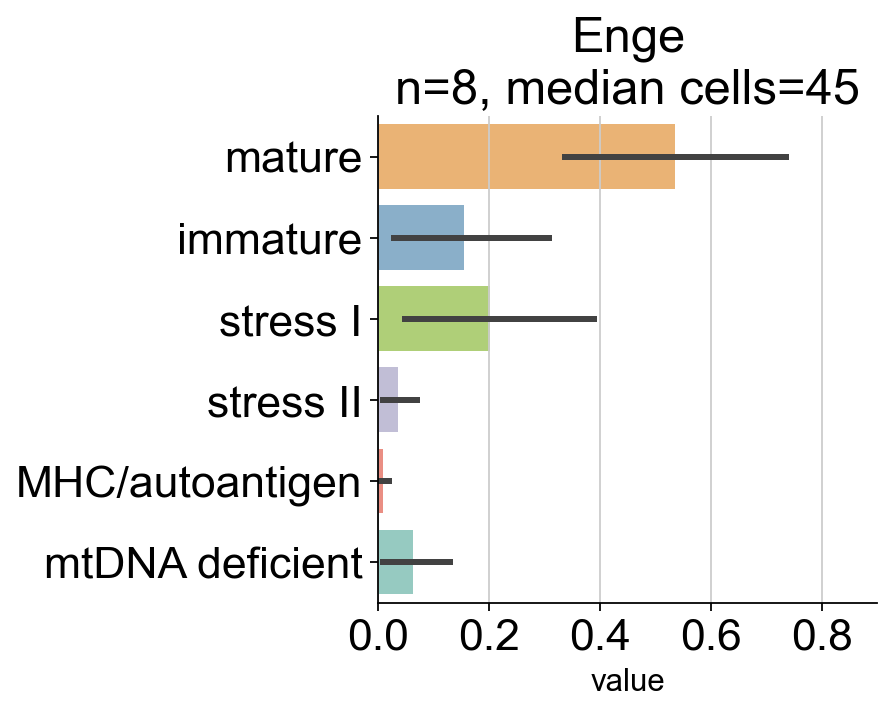

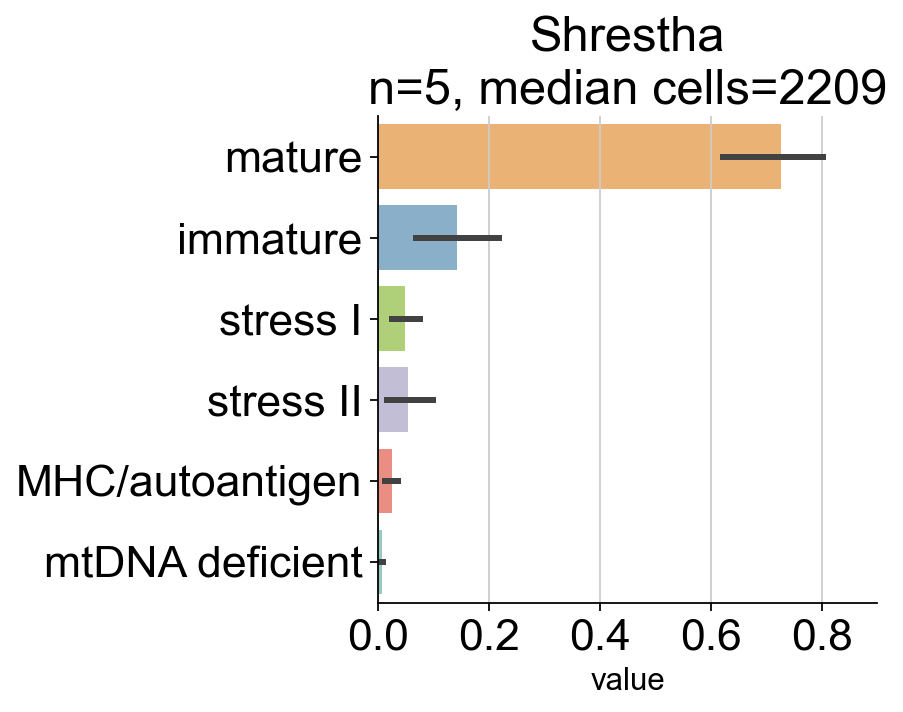

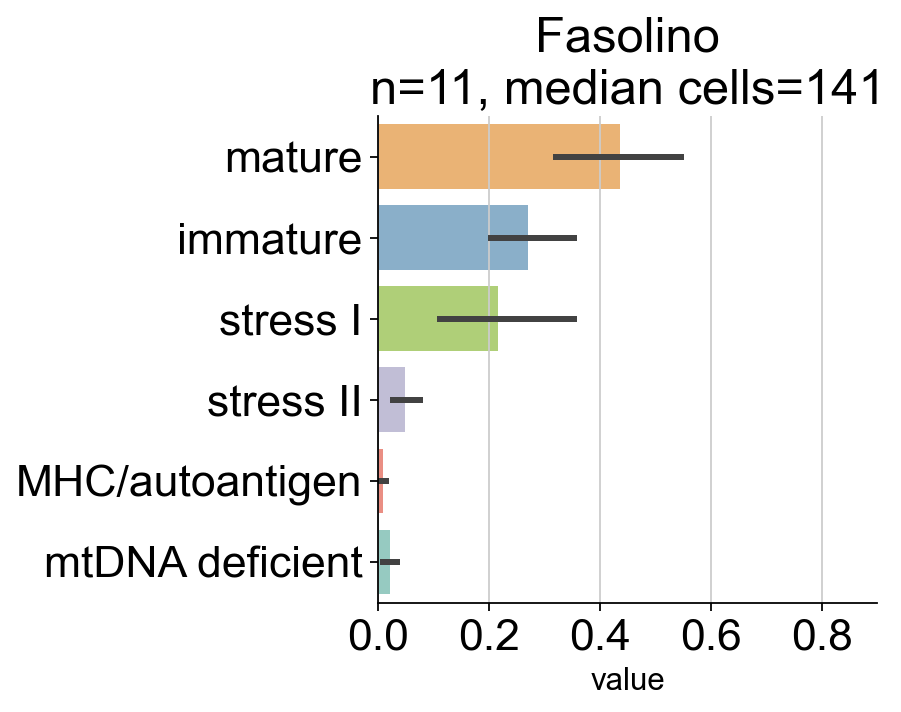

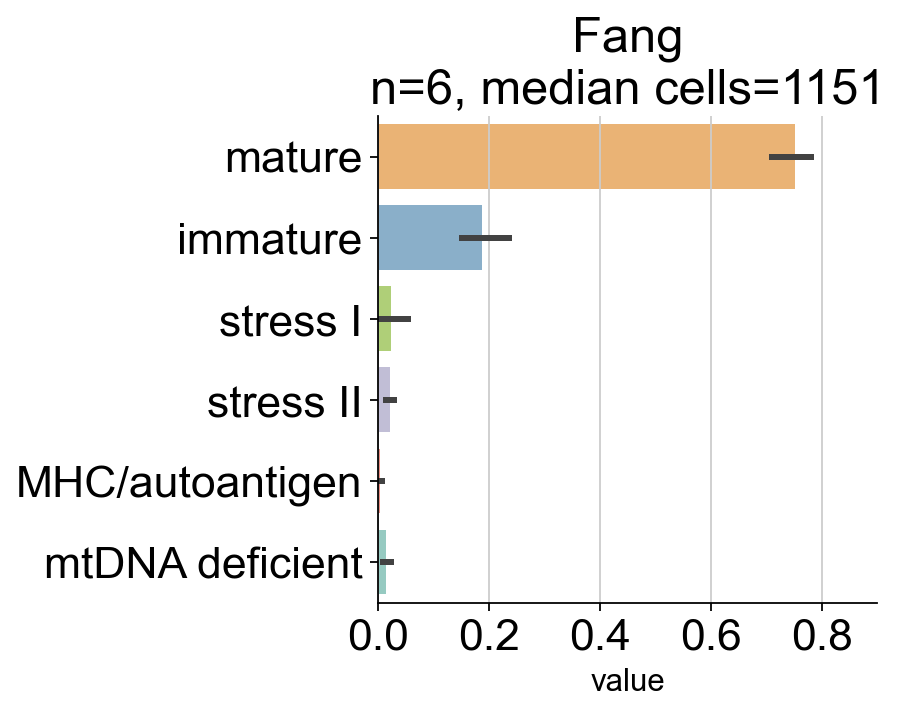

In [46]:
for k,v in beta_dict_healthy_g.items():

    x='louvain_anno_fine'
    hue='donor'
    y='proportion'

    df = pd.crosstab(v.obs[x], v.obs[hue], normalize=1)

    df.index = df.index.tolist()
    df.columns = df.columns.tolist()
    prop_df = df.reset_index().melt(id_vars=['index'])

    sns.barplot(y='index', x='value', data=prop_df, palette=adata_beta.uns['louvain_anno_fine_colors'], orient='h')
    pl.xlim([0, 0.9])
    pl.xticks(rotation=0,fontsize=20)
    pl.yticks(rotation=0,fontsize=20)
    n_cells = int(v.obs.donor.value_counts().median())
    n_d = len(v.obs.donor.unique())
    pl.title(f'{k}\nn={n_d}, median cells={n_cells}', fontsize=22)
    pl.ylabel('')
    sns.despine()
    pl.show()

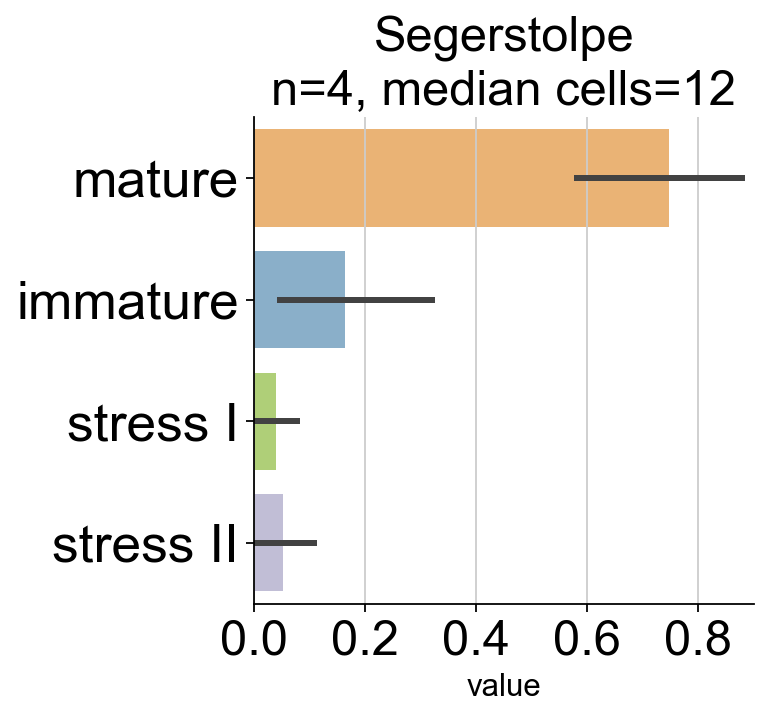

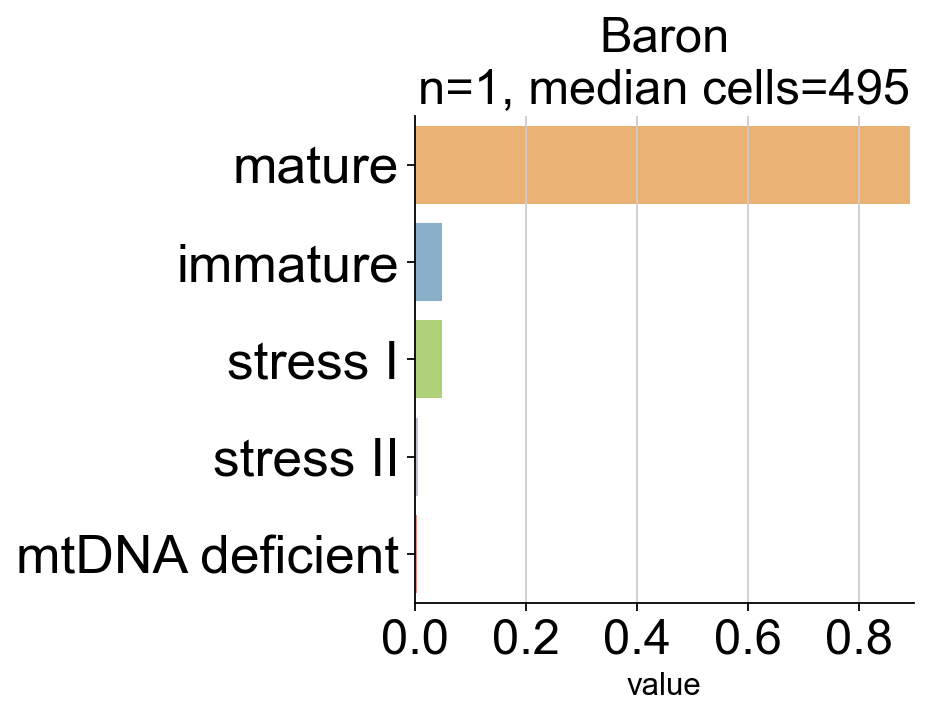

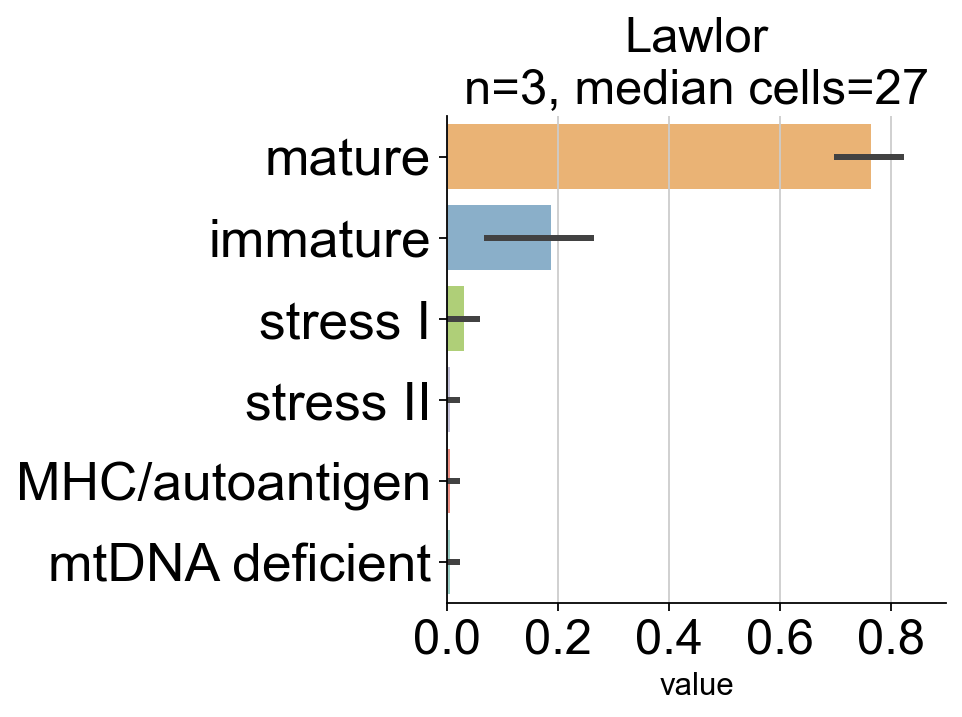

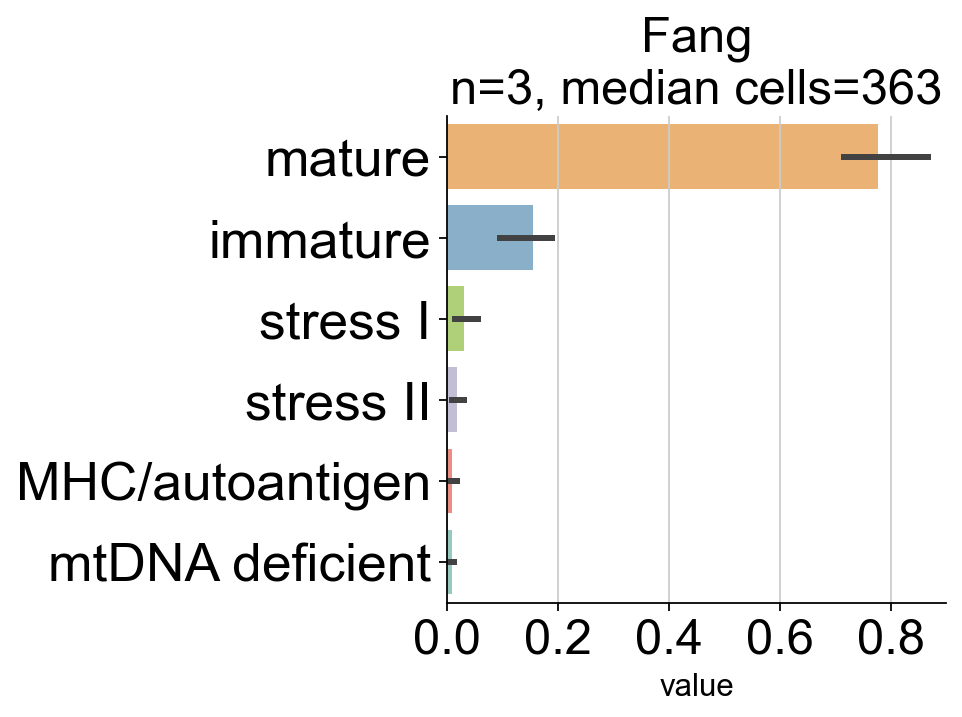

In [48]:
for k,v in beta_dict_t2d_g.items():    
        x='louvain_anno_fine'
        hue='donor'
        y='proportion'

        df = pd.crosstab(v.obs[x], v.obs[hue], normalize=1)

        df.index = df.index.tolist()
        df.columns = df.columns.tolist()
        prop_df = df.reset_index().melt(id_vars=['index'])

        sns.barplot(y='index', x='value', data=prop_df, palette=adata_beta.uns['louvain_anno_fine_colors'], orient='h')
        pl.xlim([0, 0.9])
        pl.xticks(rotation=0,fontsize=22)
        pl.yticks(rotation=0,fontsize=24)
        n_cells = int(v.obs.donor.value_counts().median())
        n_d = len(v.obs.donor.unique())
        pl.title(f'{k}\nn={n_d}, median cells={n_cells}', fontsize=22)
        pl.ylabel('')
        sns.despine()
        pl.show()

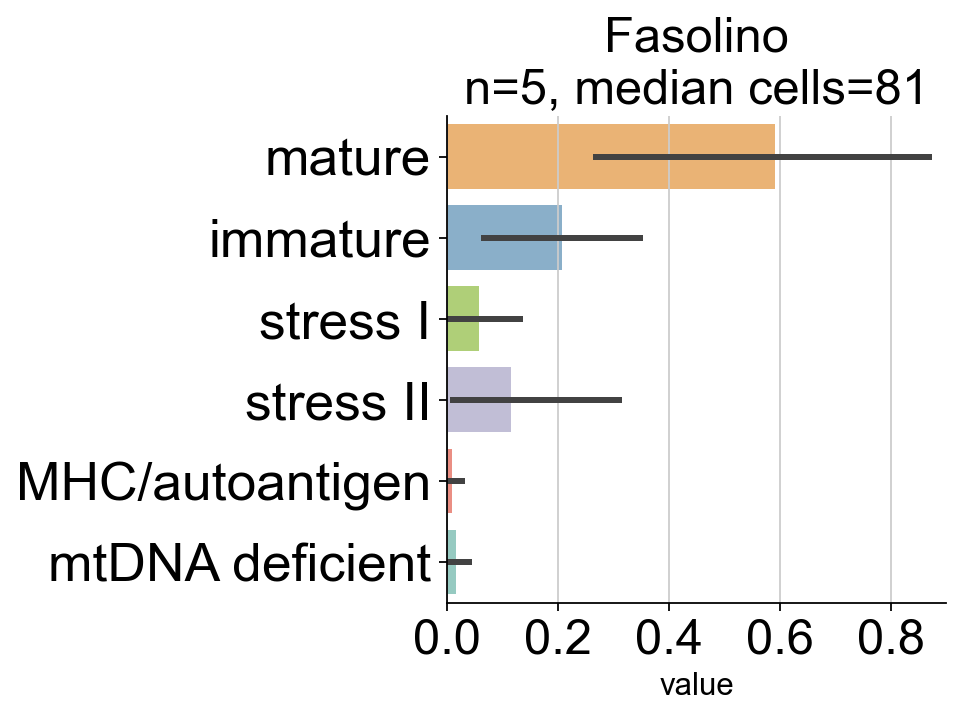

In [49]:
for k,v in beta_dict_t1d_g.items():    
        x='louvain_anno_fine'
        hue='donor'
        y='proportion'

        df = pd.crosstab(v.obs[x], v.obs[hue], normalize=1)

        df.index = df.index.tolist()
        df.columns = df.columns.tolist()
        prop_df = df.reset_index().melt(id_vars=['index'])

        sns.barplot(y='index', x='value', data=prop_df, palette=adata_beta.uns['louvain_anno_fine_colors'], orient='h')
        pl.xlim([0, 0.9])
        pl.xticks(rotation=0,fontsize=22)
        pl.yticks(rotation=0,fontsize=24)
        n_cells = int(v.obs.donor.value_counts().median())
        n_d = len(v.obs.donor.unique())
        pl.title(f'{k}\nn={n_d}, median cells={n_cells}', fontsize=22)
        pl.ylabel('')
        sns.despine()
        pl.show()

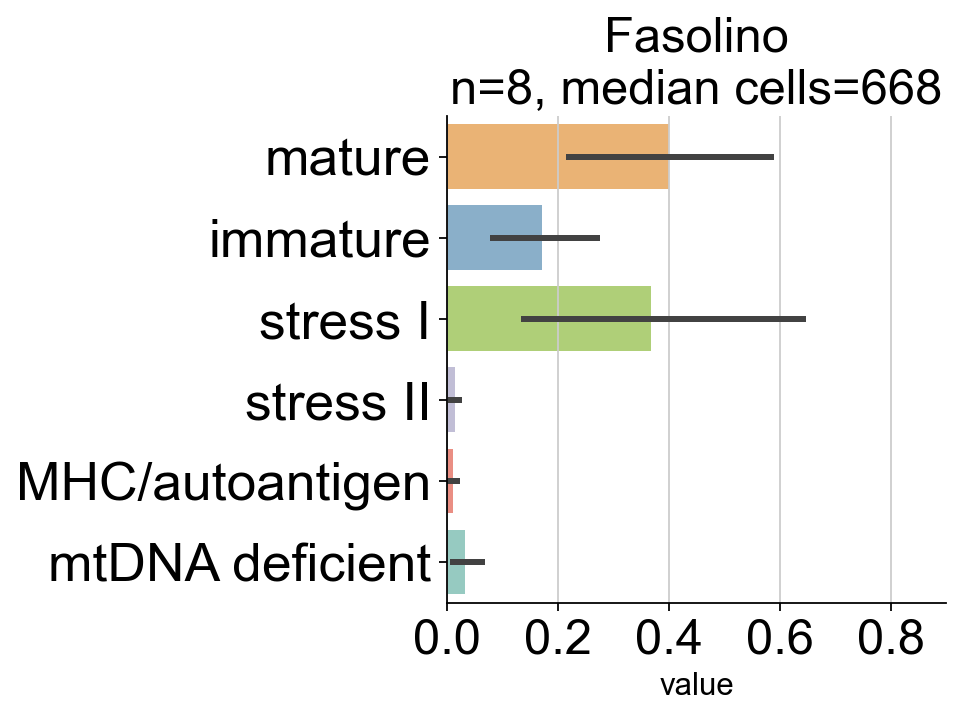

In [50]:
for k,v in beta_dict_t1d_aab_g.items():    
        x='louvain_anno_fine'
        hue='donor'
        y='proportion'

        df = pd.crosstab(v.obs[x], v.obs[hue], normalize=1)

        df.index = df.index.tolist()
        df.columns = df.columns.tolist()
        prop_df = df.reset_index().melt(id_vars=['index'])

        sns.barplot(y='index', x='value', data=prop_df, palette=adata_beta.uns['louvain_anno_fine_colors'], orient='h')
        pl.xlim([0, 0.9])
        pl.xticks(rotation=0,fontsize=22)
        pl.yticks(rotation=0,fontsize=24)
        n_cells = int(v.obs.donor.value_counts().median())
        n_d = len(v.obs.donor.unique())
        pl.title(f'{k}\nn={n_d}, median cells={n_cells}', fontsize=22)
        pl.ylabel('')
        sns.despine()
        pl.show()

### Module activation

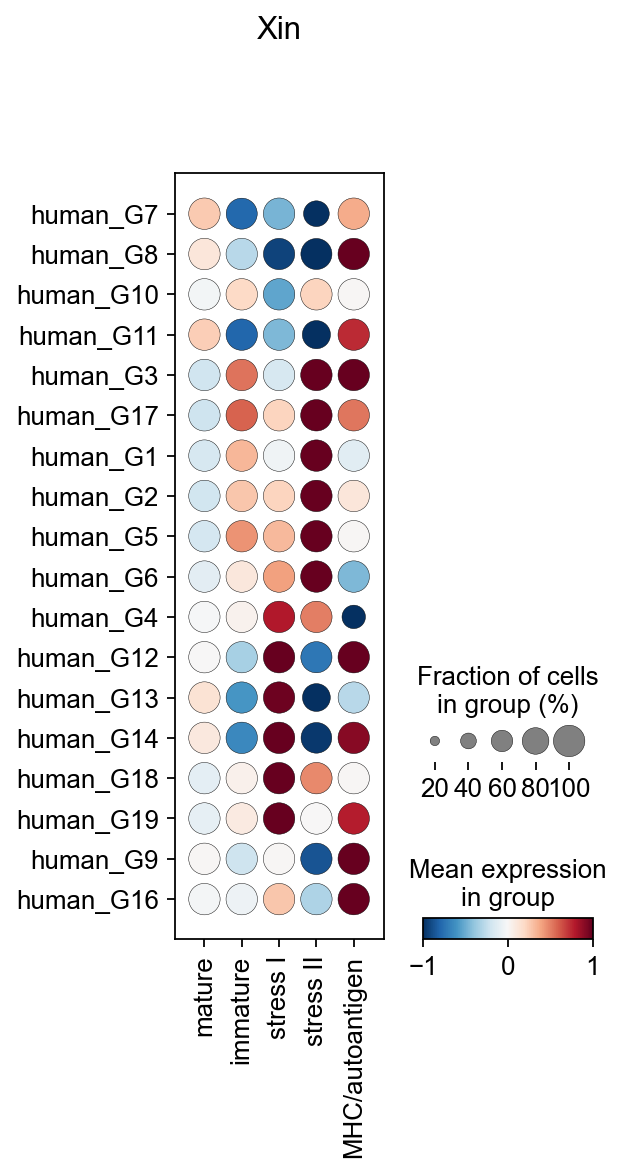

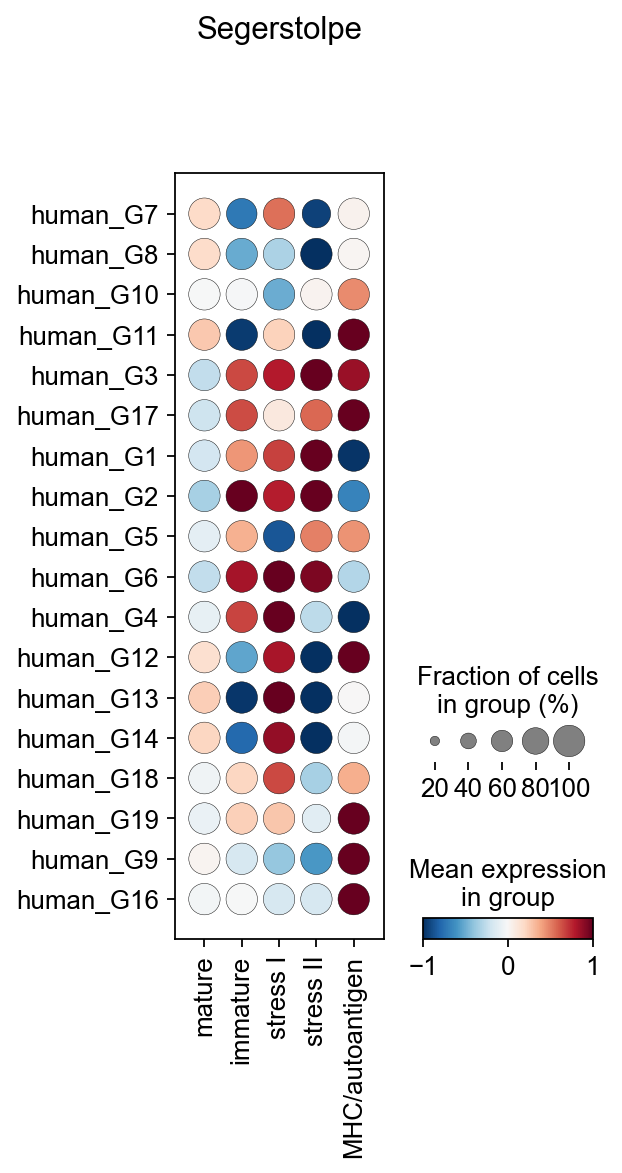

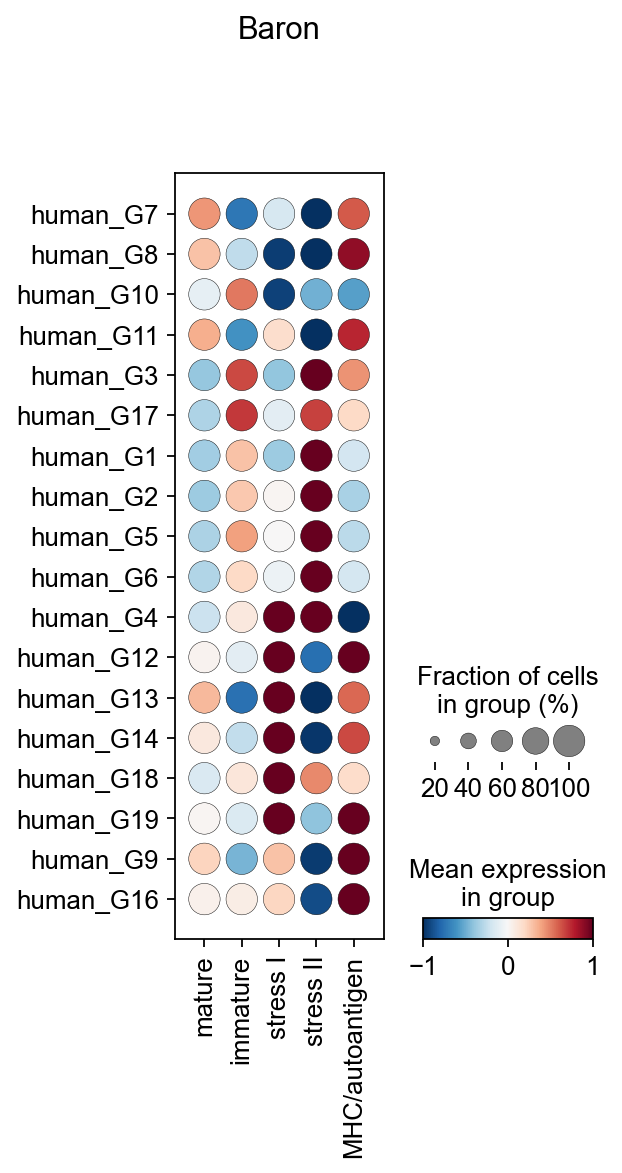

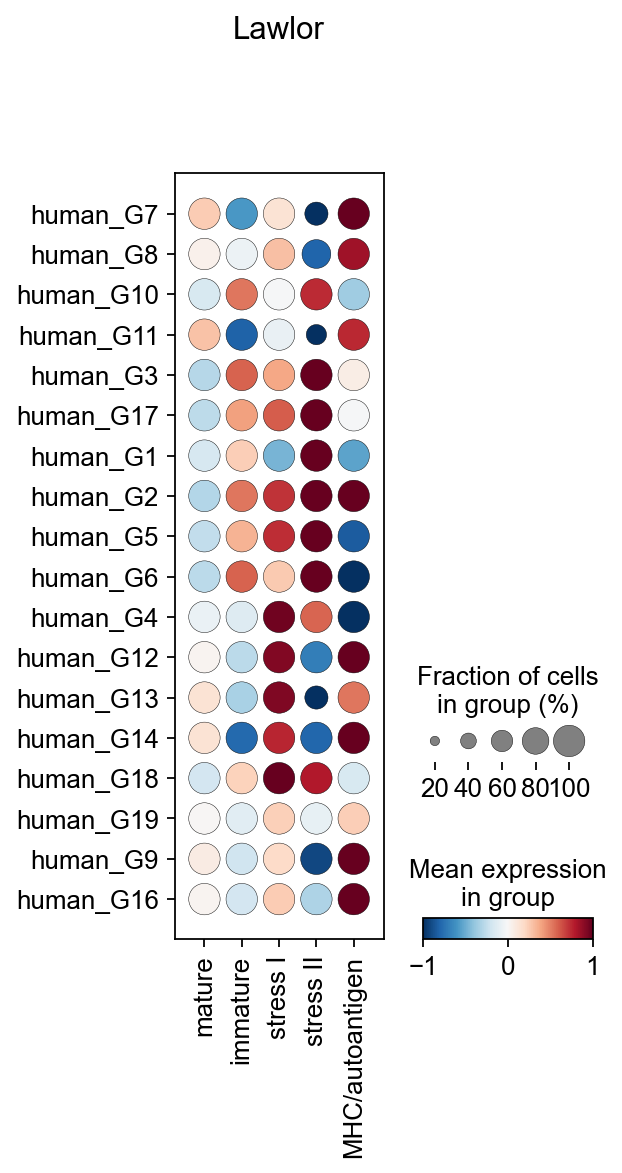

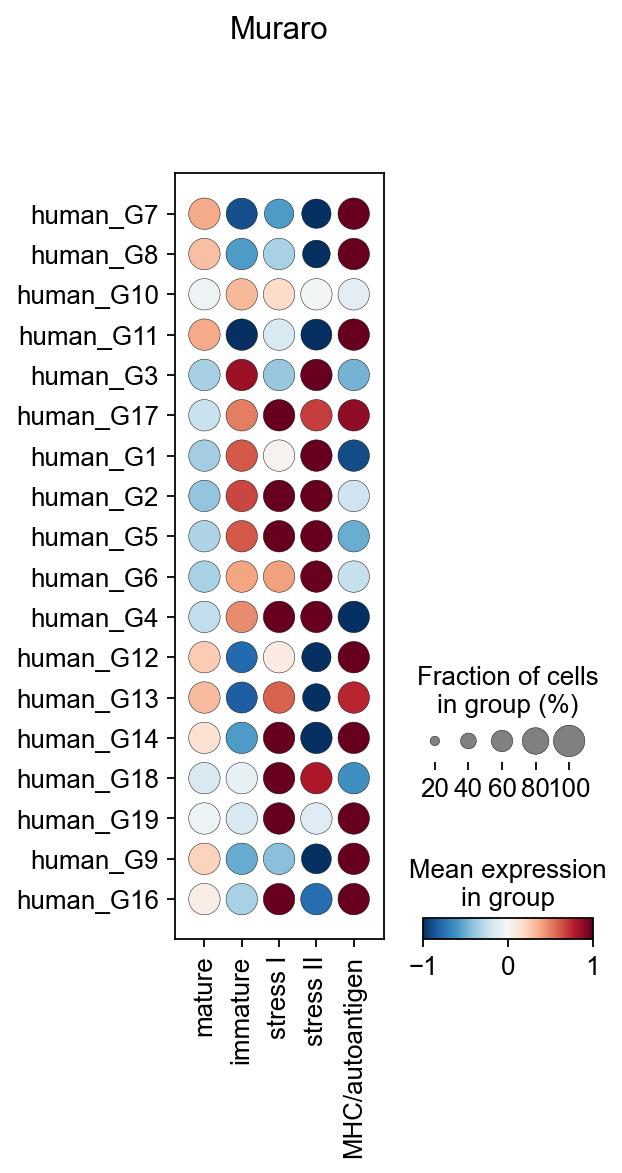

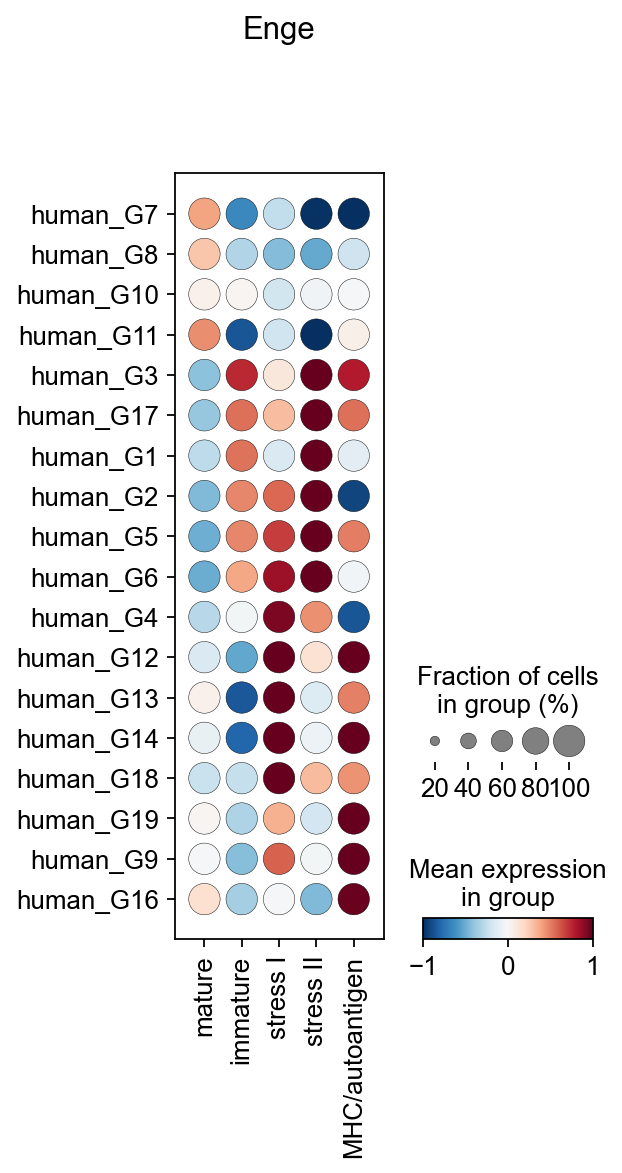

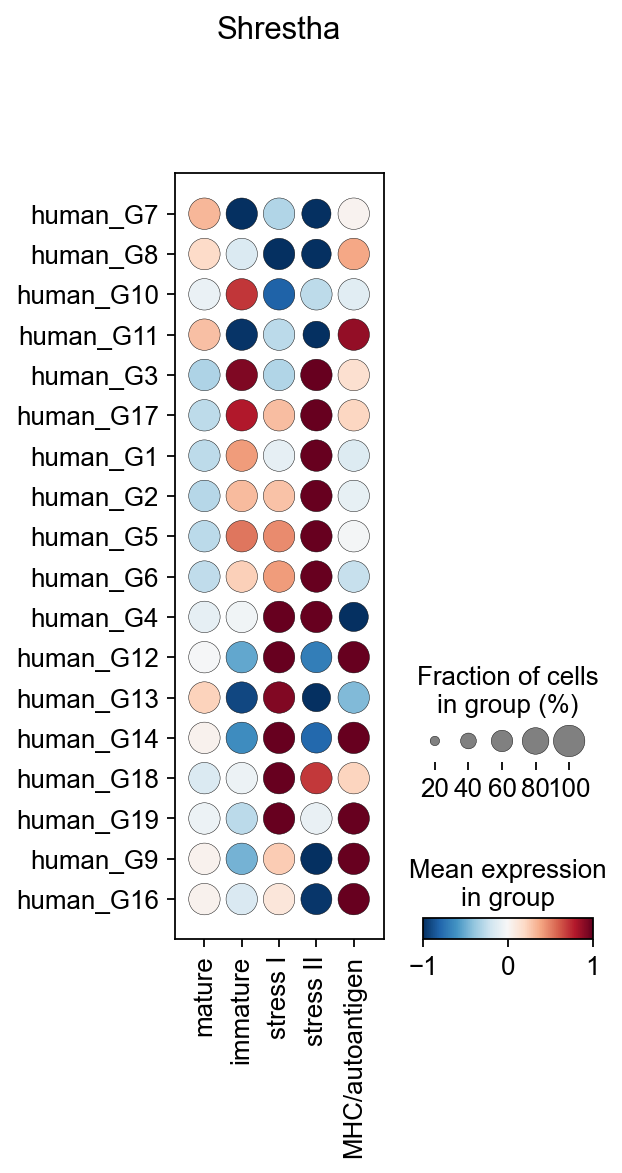

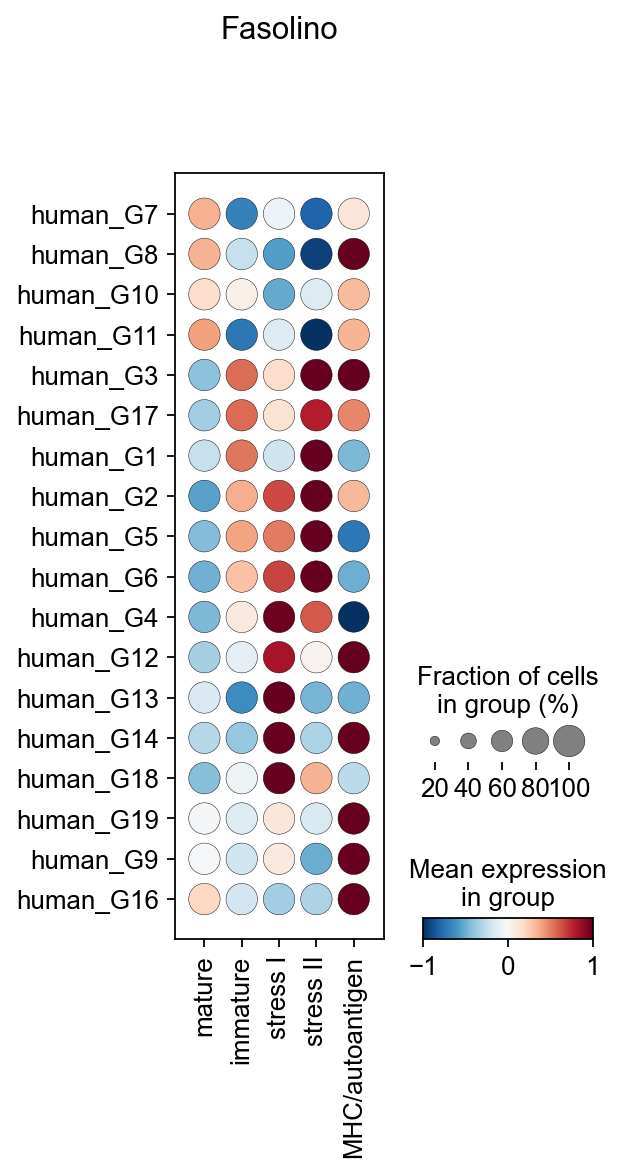

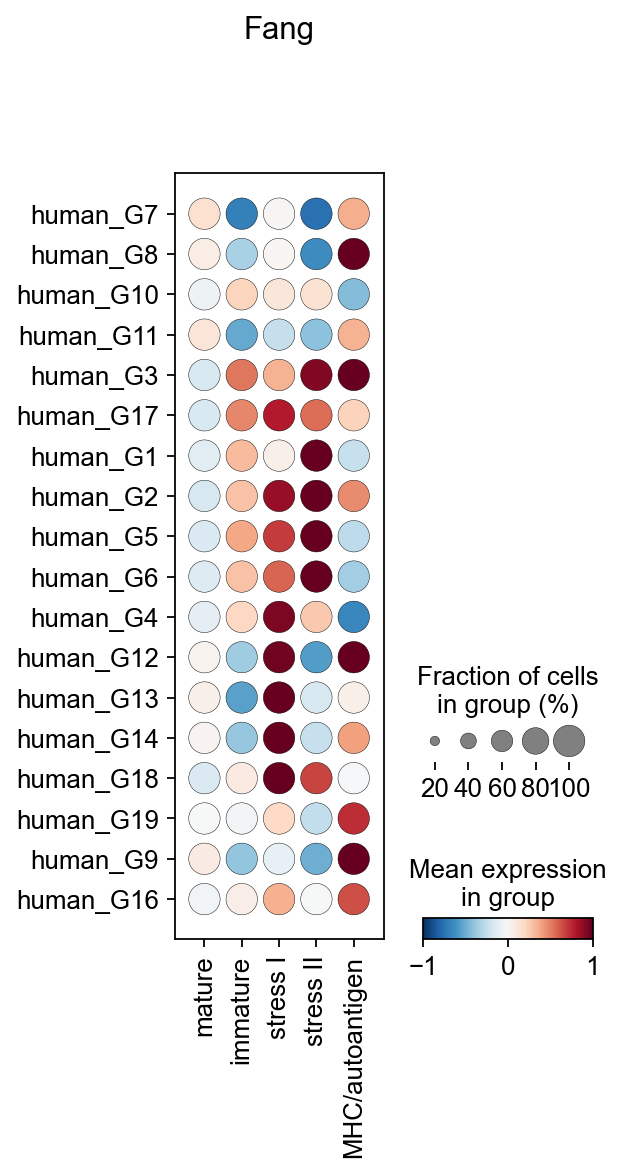

In [51]:
for k,v in beta_dict_healthy_g.items():
    v = v[~(v.obs.louvain_anno_fine=='mtDNA deficient')].copy()
    sc.pl.dotplot(sc.pp.scale(v, copy=True), groupby='louvain_anno_fine', 
                  var_names=v.var_names,
                  expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r', title=k, swap_axes=True)

### Investigate correlation with age and sex 

In [81]:
adata_g = adata_beta_g_scaled.copy()
adata_g.obs['study'] = 'Tritschler'
adata_g.obs['sex'] = adata_beta_g_scaled.obs.sex_x.copy()
adatas = []
for k,v in beta_dict_healthy_g.items():
    v.obs['study'] = k
    adatas.append(v)

In [83]:
adata_g = adata_g.concatenate(adatas)

In [84]:
adata_g.obs['sex'] = adata_g.obs['sex'].tolist()
adata_g.obs['sex'].replace({'Female': 'female', 'Male': 'male', 'F':'female', 'M':'male', 'unknown':'n.a.'}, inplace=True)

In [85]:
adata_g.obs['age'].fillna('n.a', inplace=True)

In [86]:
adata_g.obs['donor'] = adata_g.obs['study'] + '_' + adata_g.obs['sex'] + '_' + adata_g.obs['age'].astype('str') + '_' + adata_g.obs['donor']

In [87]:
x='louvain_anno_fine'
hue='donor'
df = pd.crosstab(adata_g.obs[x], adata_g.obs[hue], normalize=1)
df.index = df.index.tolist()
df.columns = df.columns.tolist()
prop_df = df.reset_index().melt(id_vars=['index'])

In [88]:
prop_df['study'] = [x.split('_')[0] for x in prop_df.variable]
prop_df['sex'] = [x.split('_')[1] for x in prop_df.variable]

In [89]:
prop_df['age'] = [np.nan if x.split('_')[2]=='n.a' else int(x.split('_')[2]) for x in prop_df.variable]

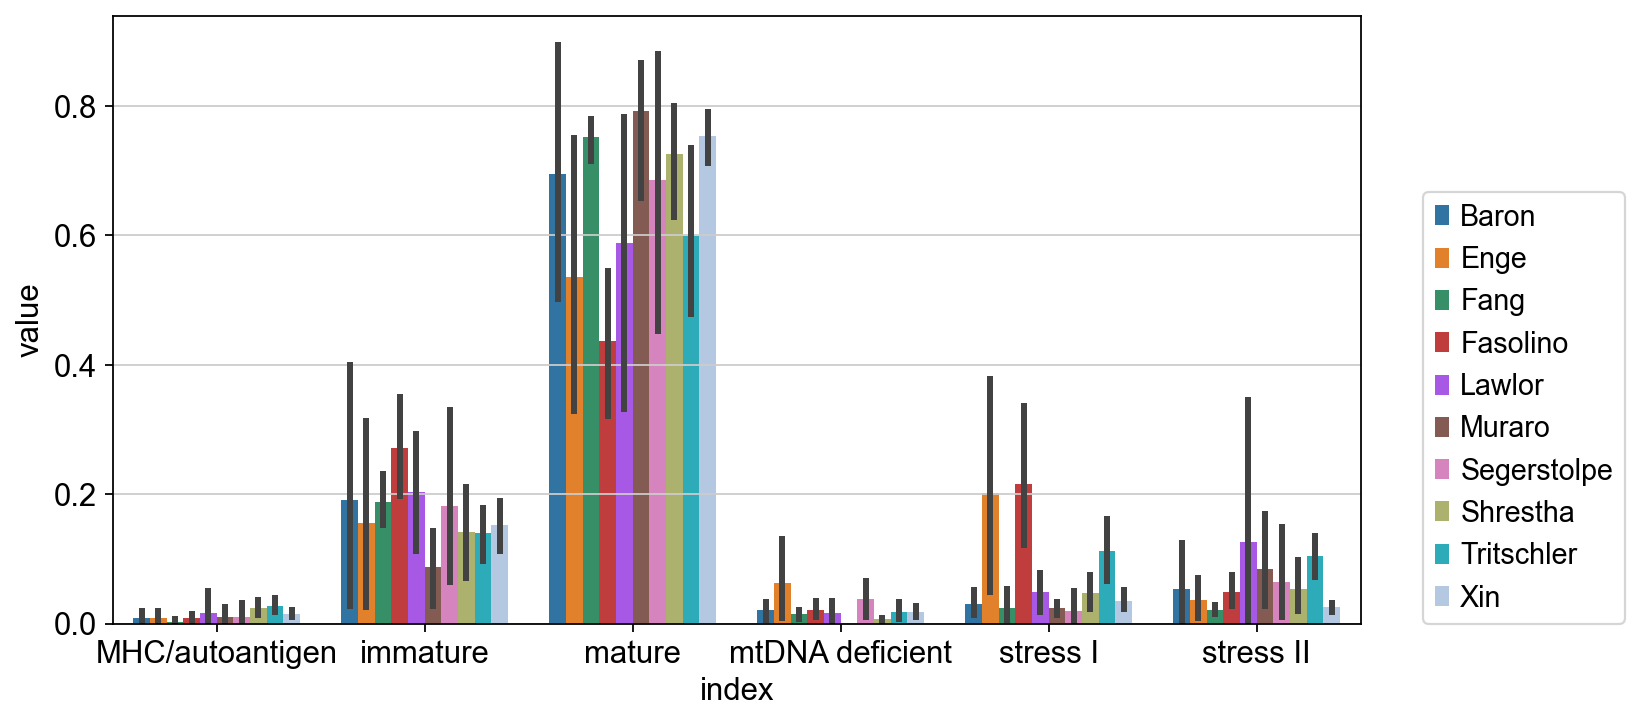

In [90]:
fig, ax = pl.subplots(figsize=(10, 5))
sns.barplot(x='index', y='value', hue='study', data=prop_df, ax=ax)
ax.legend(loc=(1.05,0))

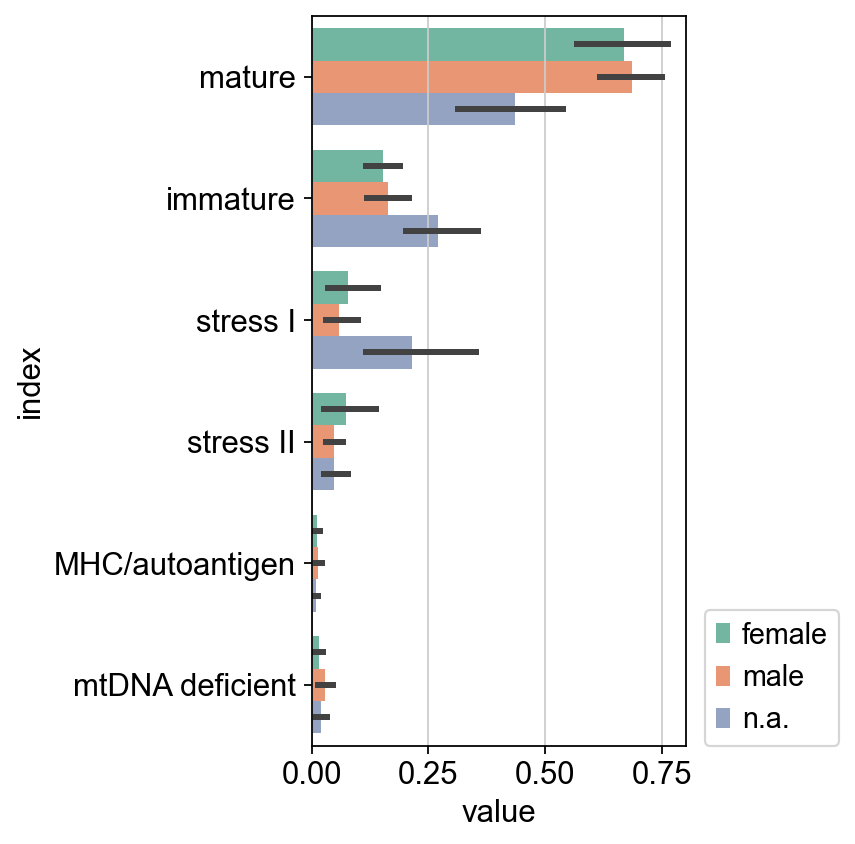

In [91]:
fig, ax = pl.subplots(figsize=(3, 6))
sns.barplot(y='index', x='value', hue='sex', data=prop_df, ax=ax, palette=['#66c2a5', '#fc8d62', '#8da0cb'], orient='h',
            order=['mature', 'immature', 'stress I', 'stress II', 'MHC/autoantigen', 'mtDNA deficient'])
ax.legend(loc=(1.05,0))

In [93]:
prop_df.loc[prop_df['index']=='mature'].sex.value_counts()

male      36
female    18
n.a.      11
Name: sex, dtype: int64

In [94]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0], stats.pearsonr(x, y)[1]

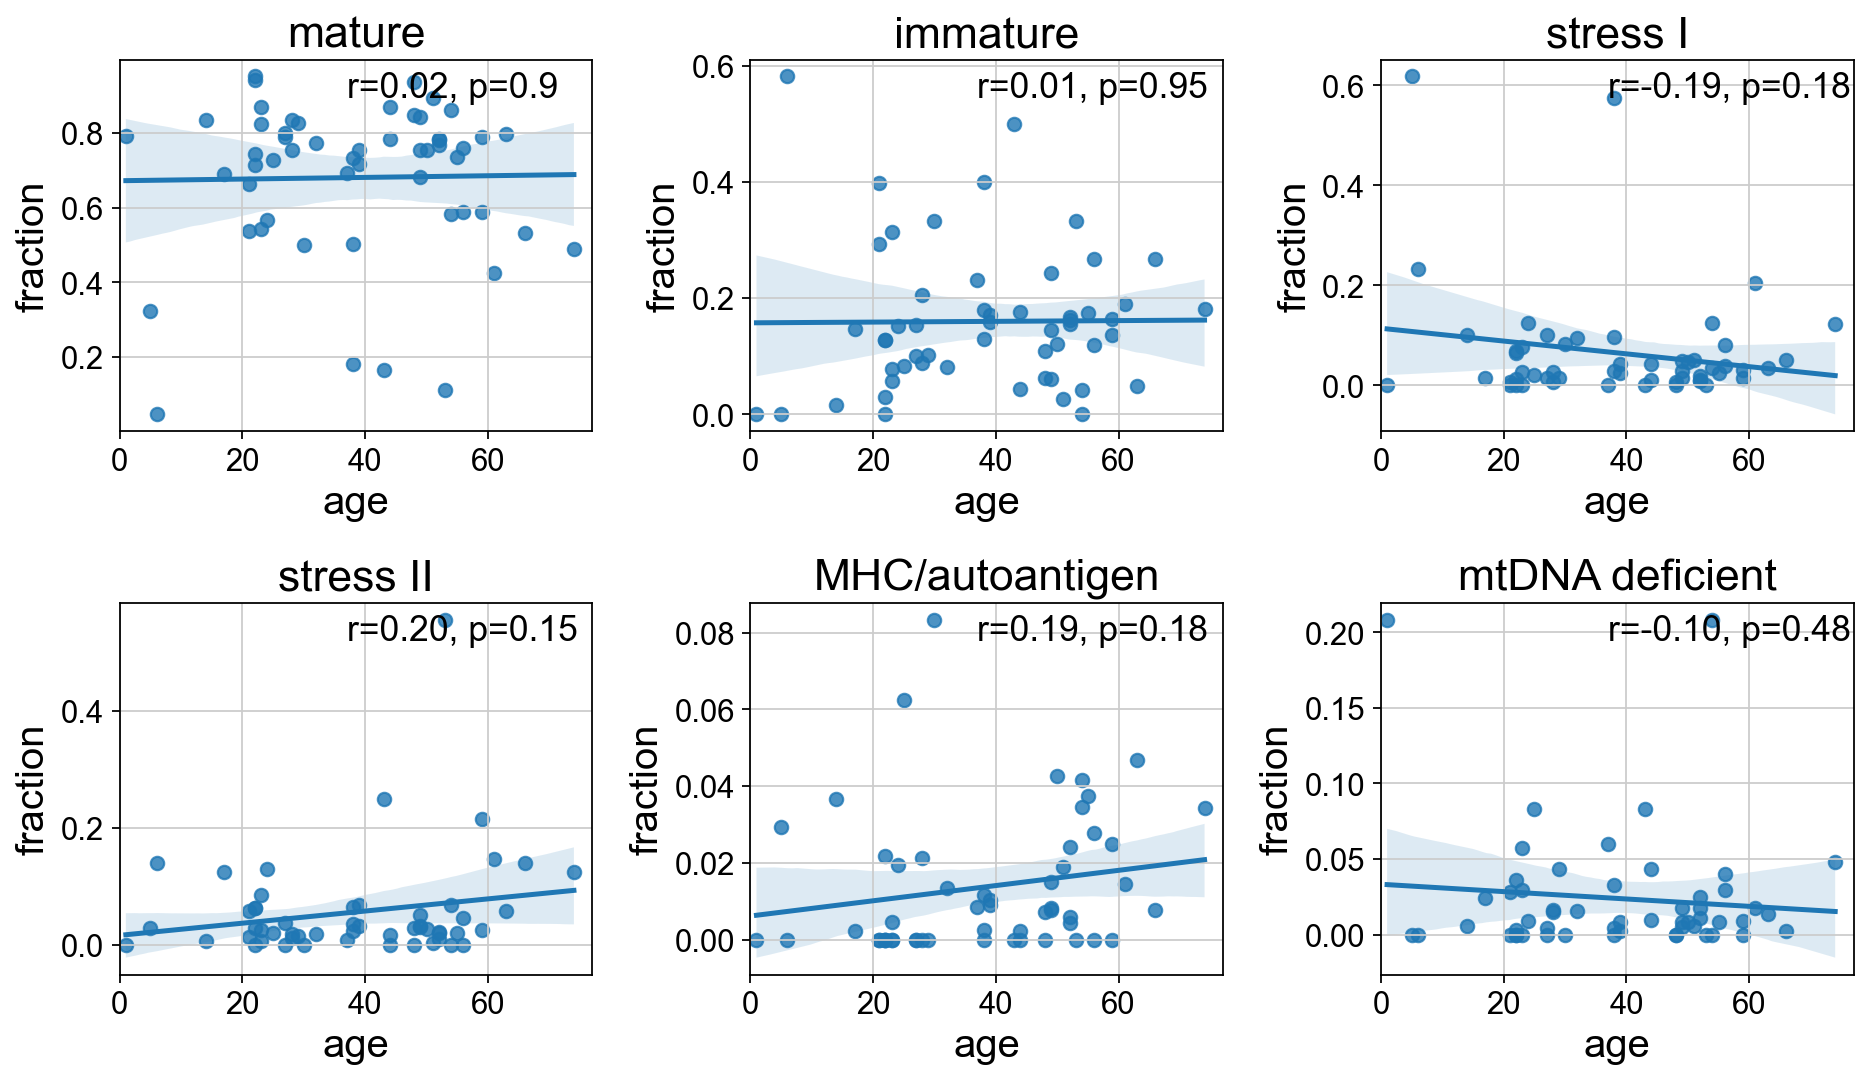

In [95]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 7))
axs = axs.flatten()
for i,x in enumerate(['mature', 'immature', 'stress I', 'stress II', 'MHC/autoantigen', 'mtDNA deficient']):
    df_sub = prop_df.loc[prop_df['index']==x].copy()
    sns.regplot(data=df_sub, y='value', x='age', ax=axs[i])
    axs[i].set_title(x, fontsize=20)
    r,p = r2(df_sub.dropna()['age'], df_sub.dropna()['value'])
    axs[i].text(.48, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=axs[i].transAxes, fontsize=16)
    axs[i].set_xlim([0,77])
    axs[i].set_ylabel('fraction', fontsize=18)
    axs[i].set_xlabel('age', fontsize=18)
pl.tight_layout()
pl.show()

### marker expression

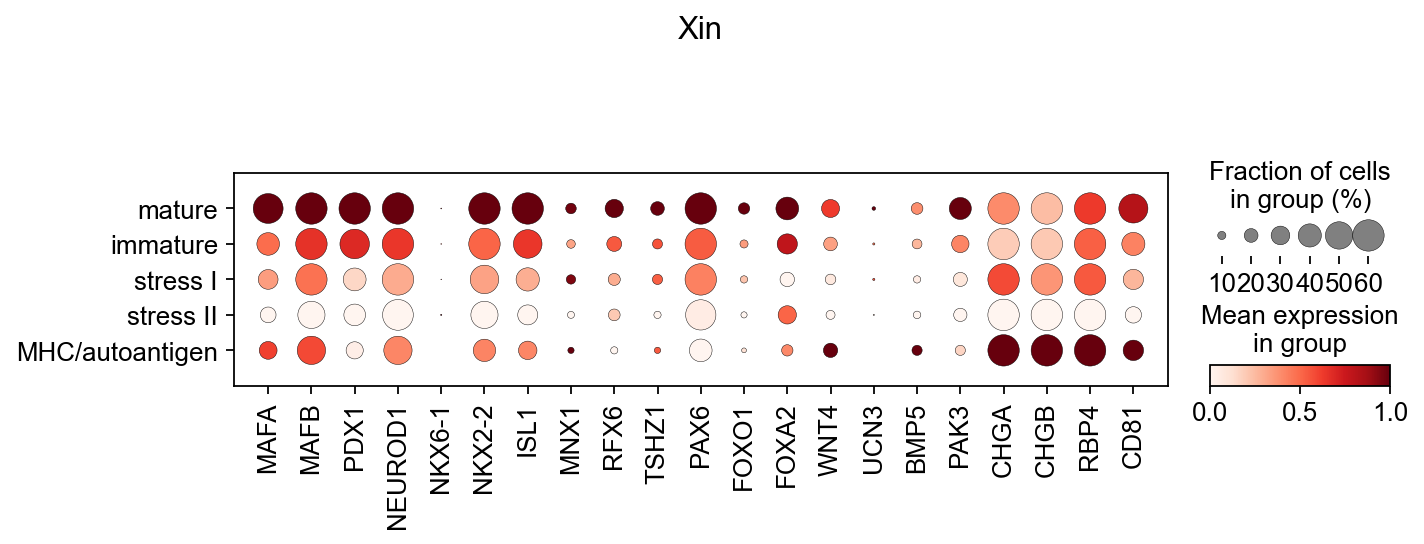

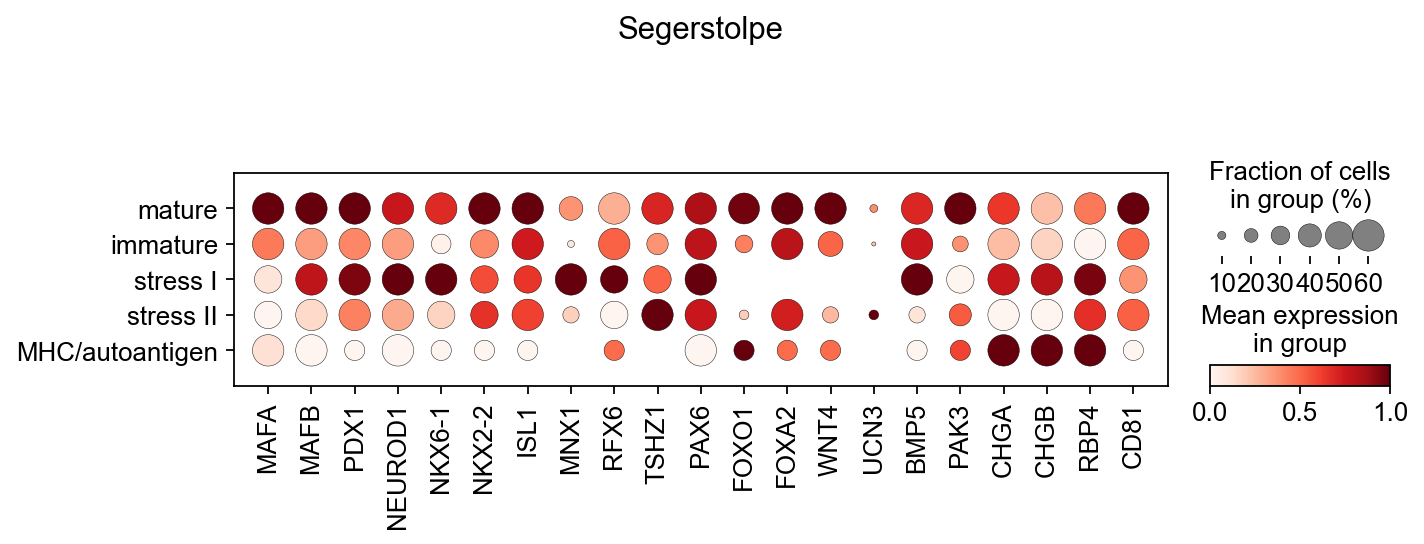

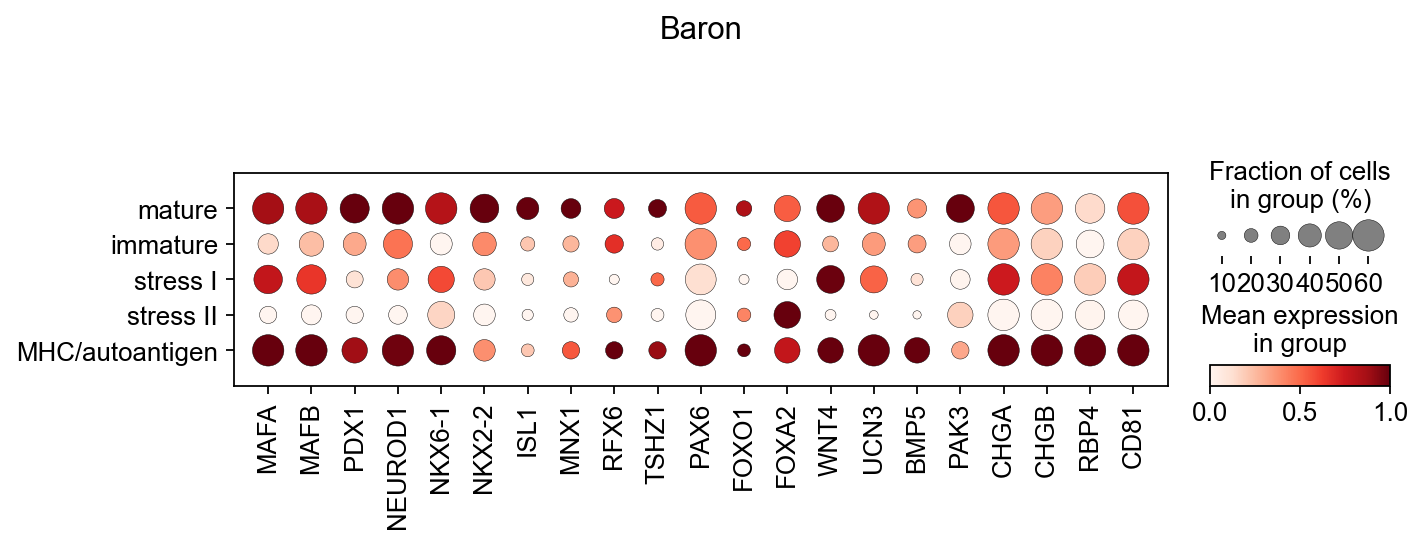

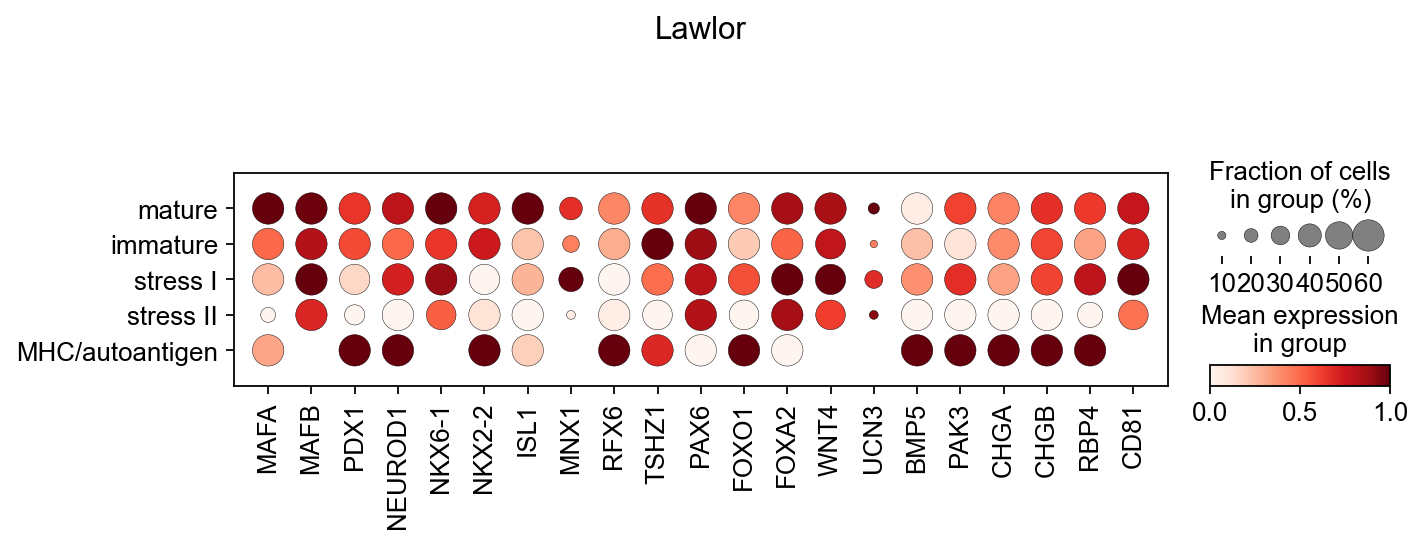

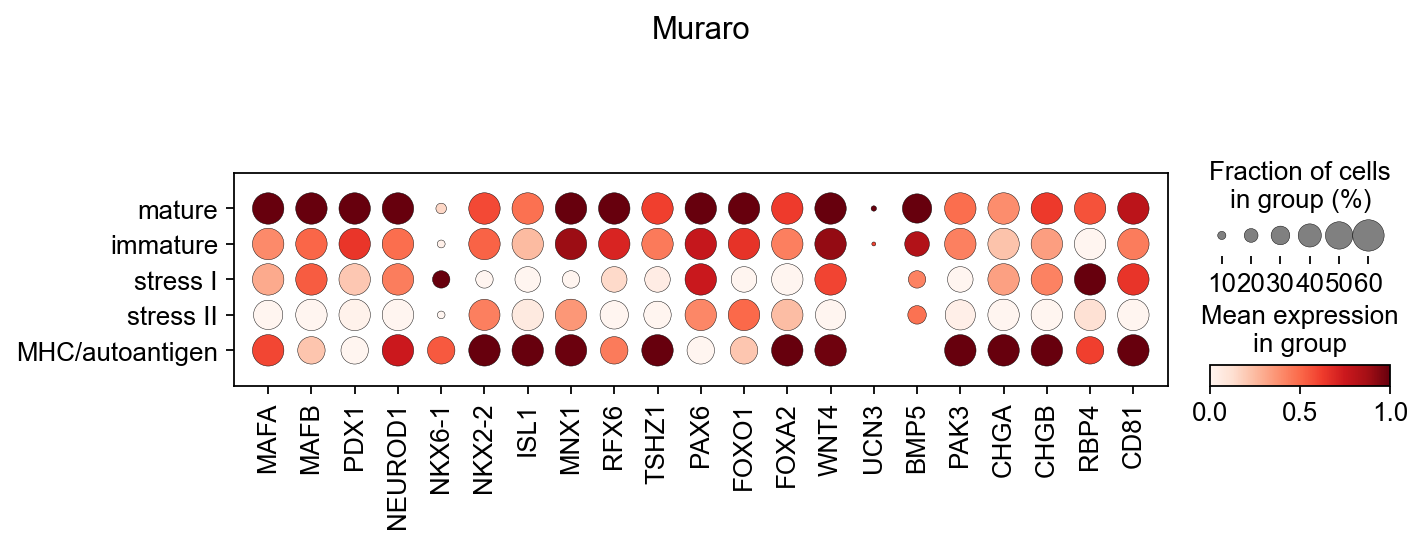

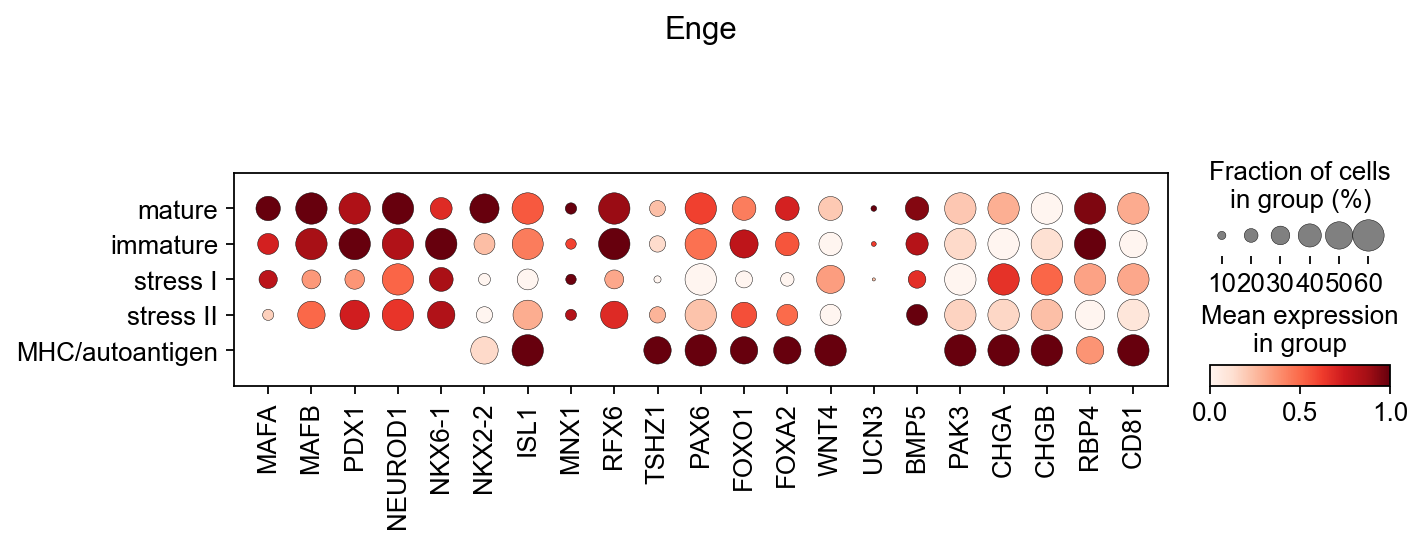

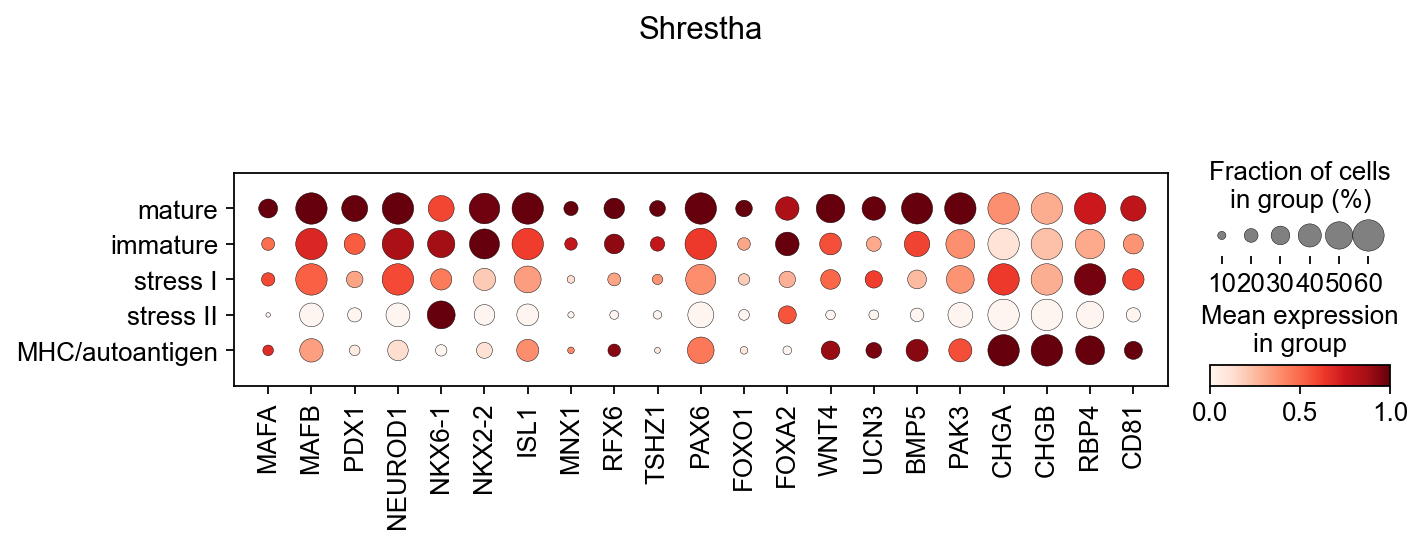

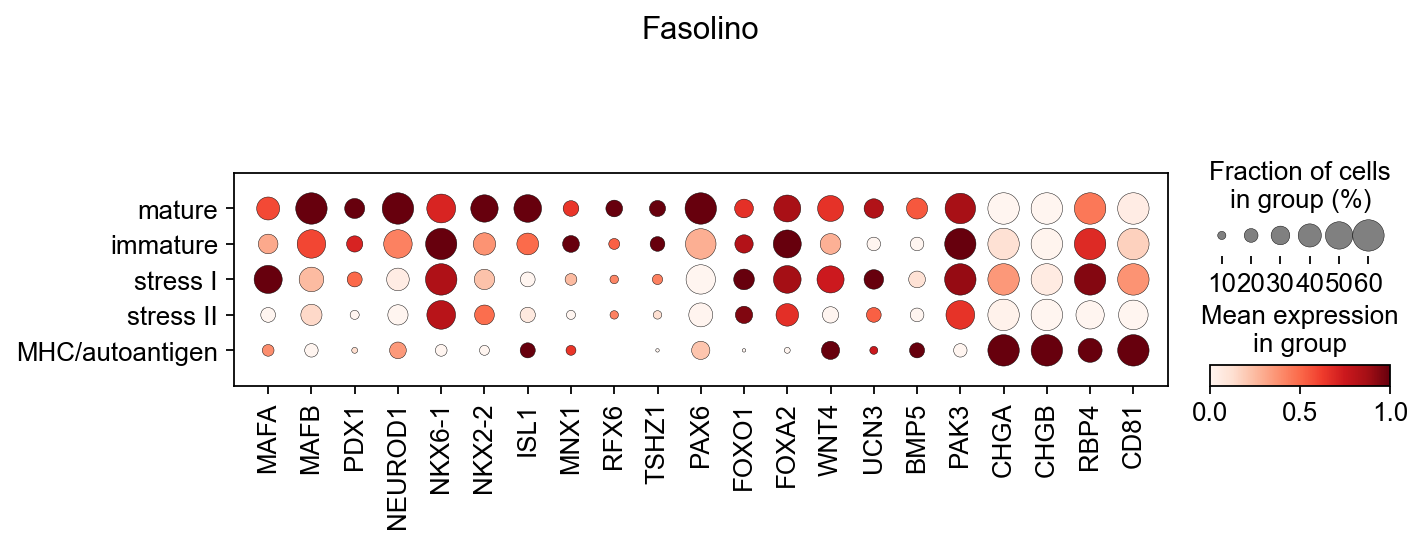

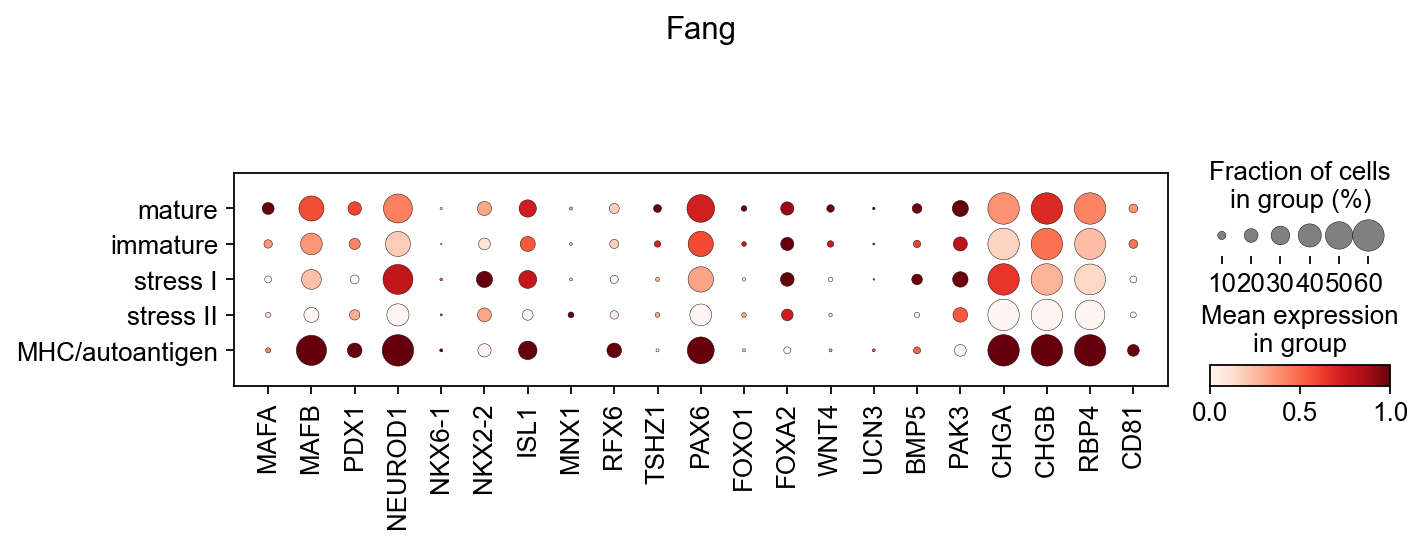

In [66]:
for k,v in beta_dict_healthy.items():
    v = v[~(v.obs.louvain_anno_fine=='mtDNA deficient')].copy()
    sc.pl.dotplot(v, groupby='louvain_anno_fine',
                  var_names=['MAFA', 'MAFB', 'PDX1', 'NEUROD1', 'NKX6-1', 'NKX2-2', 'ISL1', 'MNX1', 'RFX6', 
                             'TSHZ1', 'PAX6', 'FOXO1', 'FOXA2', 'WNT4', 'UCN3', 'BMP5', 'PAK3', 
                             'CHGA', 'CHGB', 'RBP4', 'CD81'],
                  standard_scale='var', dot_max=0.6, title=k)